## Business Case:-To Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. 


-Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels


#### Supervised learning with Regression task

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d1=pd.read_csv('auto_imports.csv')
d1.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

In [3]:
d1

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
data=d1.rename(columns={'3':'symboling','?':'normalized_losses','alfa-romero':'make','gas':'fueltype','std':'aspiration','two':'num_of_doors','convertible':'body_style','rwd':'drive_wheels','front':'engine_location','88.60':'wheel_base','168.80':'length','64.10':'width','48.80':'height','2548':'curb_weight','dohc':'engine_type','four':'num_of_cylinders','130':'engine_size','mpfi':'fuel_system','3.47':'bore','2.68':'stroke','9.00':'compression_ratio','111':'horsepower','5000':'peak_rpm','21':'city_mpg','27':'highway_mpg','13495':'price'})

In [5]:
data

,symboling,normalized_losses,make,fueltype,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fueltype           200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

In [7]:
data.shape

(200, 26)

In [8]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fueltype             0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

## Domain Analysis

1. symboling: -3, -2, -1, 0, 1, 2, 3. Symboling corresponds to the degree to which the auto is more risky than its price indicates. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe


2. normalized-losses: continuous from 65 to 256.


3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo (brand)


4. fuel-type: diesel, gas.


5. aspiration: std, turbo. Is an internal combustion engine in which air intake depends solely on atmospheric pressure and does not have forced induction through a turbocharger or a supercharger.

6. num-of-doors: four, two.

7. body-style: hardtop, wagon, sedan, hatchback, convertible.

8. drive-wheels: 4wd :4WD means the power from the engine is delivered to all 4 wheels – all of the time.
, fwd :Front wheel drive (FWD) means that the power from the engine is delivered to the front wheels
, rwd :Rear-wheel drive (RWD) is a form of engine and transmission layout used in motor vehicles, in which the engine drives the rear wheels only

9. engine-location: front, rear.

10. wheel-base: continuous from 86.6 120.9. The wheelbase of any vehicle is the distance between the centre of the front wheels and the centre of the rear wheels.

11. length: continuous from 141.1 to 208.1. car length

12. width: continuous from 60.3 to 72.3.

13. height: continuous from 47.8 to 59.8.

14. curb-weight: continuous from 1488 to 4066. The “curb weight” of your car is the weight of the vehicle without any passenger or items in it except for the standard equipment that comes with it. 

15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.

16. num-of-cylinders: eight, five, four, six, three, twelve, two.

17. engine-size: continuous from 61 to 326.

18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.

19. bore: continuous from 2.54 to 3.94.In gasoline engine: Combustion chamber. Bore is the inner diameter of the cylinder. 

20. stroke: continuous from 2.07 to 4.17.The piston rides up and down inside the cylinder on a connecting rod that attaches to the crankshaft, causing the crankshaft to turn. Each movement of the piston is called a stroke. Four strokes — down, up, down, up — complete the cycle that creates the power to drive the engine.

21. compression-ratio: continuous from 7 to 23.The compression ratio is the ratio between the volume of the cylinder and combustion chamber in an internal combustion engine at their maximum and minimum values.

22. horsepower: continuous from 48 to 288.Horsepower (hp) is the metric used to indicate the power produced by a car's engine - the higher the number, the more power is sent to the wheels and, in theory, the faster it will go. 

23. peak-rpm: continuous from 4150 to 6600.rpm : revolutions per minute

## Basic checks

In [9]:
data.head()

,symboling,normalized_losses,make,fueltype,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [10]:
data.tail()

,symboling,normalized_losses,make,fueltype,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [11]:
data.describe() 

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


Insights :
        There are no constant values in the data
        
        No null values 
        
        Hightest price of car given is 45400.000000
        
        Lowest price of car  given  is 5118.000000

In [12]:
data.describe(include='O')

,normalized_losses,make,fueltype,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,bore,stroke,horsepower,peak_rpm
count,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,36,32,180,164,113,94,118,197,145,156,91,23,19,19,36


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fueltype           200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fueltype           200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

In [15]:
data.head(2)

,symboling,normalized_losses,make,fueltype,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [16]:
data.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [17]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

## EDA


### Univariate analysis

In [18]:
## Symboling

def printing_info(column):
    print('\t\t',column.capitalize(),'Column :\n\n')
    
    print("Unique Values")
    print(data[column].unique())
    print('='*50)
    print('Value Count')
    print(data[column].value_counts())
    print('='*50)
    print("Info")
    print(data[column].info())
    print('='*50)
    print("Column Describe")
    print(data[column].describe())
    print('='*100)
printing_info('symboling')

		 Symboling Column :


Unique Values
[ 3  1  2  0 -1 -2]
Value Count
 0    65
 1    52
 2    32
 3    26
-1    22
-2     3
Name: symboling, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: symboling
Non-Null Count  Dtype
--------------  -----
200 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB
None
Column Describe
count    200.000000
mean       0.830000
std        1.248557
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64


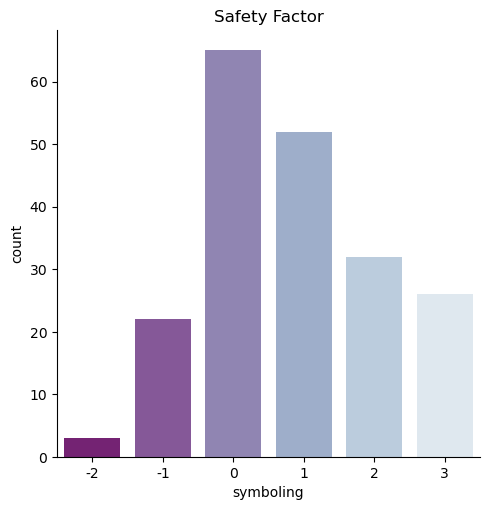

In [19]:
sns.catplot(x ='symboling',data = data,kind = 'count',palette = 'BuPu_r')
plt.title("Safety Factor")
plt.show()

##### from Symboling Column we conclude that few number of cars has high safety and the most has moderate safety factor.

In [23]:
## make
printing_info('make')


		 Make Column :


Unique Values
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Value Count
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
isuzu             2
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: make
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count        200
unique        22
top       toyo

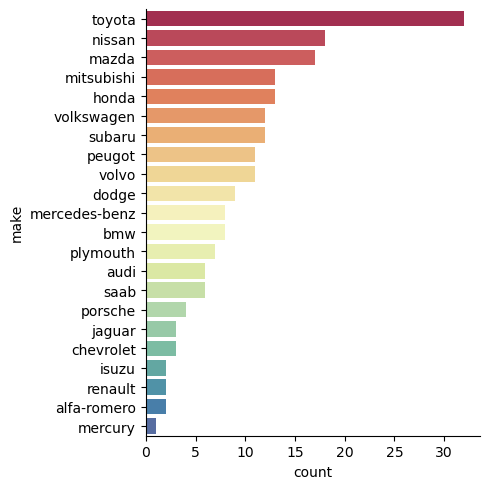

In [46]:
theorder = data['make'].value_counts().index
sns.catplot(y = 'make',data = data,kind = 'count',order =theorder,palette = 'Spectral')

##### - from Make Column we conclude that The 3 Top Makers are:
         toyote
         nissan 
         mazda. 

In [48]:
# fuel_type

printing_info('fueltype')

		 Fueltype Column :


Unique Values
['gas' 'diesel']
Value Count
gas       180
diesel     20
Name: fueltype, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: fueltype
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count     200
unique      2
top       gas
freq      180
Name: fueltype, dtype: object


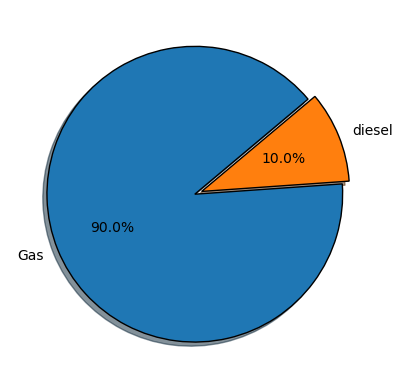

In [50]:
fuel = [data['fueltype'].value_counts()[0],data['fueltype'].value_counts()[1]]
plt.pie(fuel,labels=['Gas','diesel'],wedgeprops={'edgecolor':'black'},
        explode= [0,0.05],
        shadow=True,
        startangle=40,
        autopct = '%1.1f%%')
plt.show()

##### from Fuel-type Column we conclude that most of fuel used in data is Gas

Text(0.5, 1.0, 'Makers: between gas and diesel')

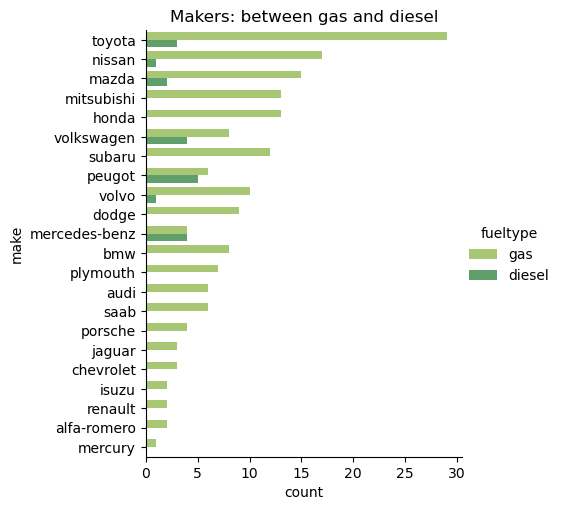

In [55]:
sns.catplot(y = 'make',data = data,kind = 'count',hue = 'fueltype',order = theorder,palette = 'summer_r')
plt.title("Makers: between gas and diesel")

##### We can also conclude  that Only "Peugot" is The Higher user of Diesel here!

In [56]:
# aspiration
printing_info('aspiration')

		 Aspiration Column :


Unique Values
['std' 'turbo']
Value Count
std      164
turbo     36
Name: aspiration, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: aspiration
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count     200
unique      2
top       std
freq      164
Name: aspiration, dtype: object


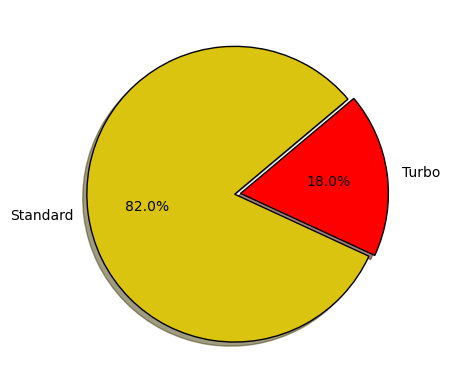

In [59]:
asp = [data['aspiration'].value_counts()[0],data['aspiration'].value_counts()[1]]
plt.pie(asp,labels=['Standard','Turbo'],colors = ['#DAC40F','red'],wedgeprops={'edgecolor':'black'},
        explode= [0,0.04],
        shadow=True,
        startangle=40,
        autopct = '%1.1f%%')
plt.show()

##### This give insight that the most Aspiration installed is the Standard

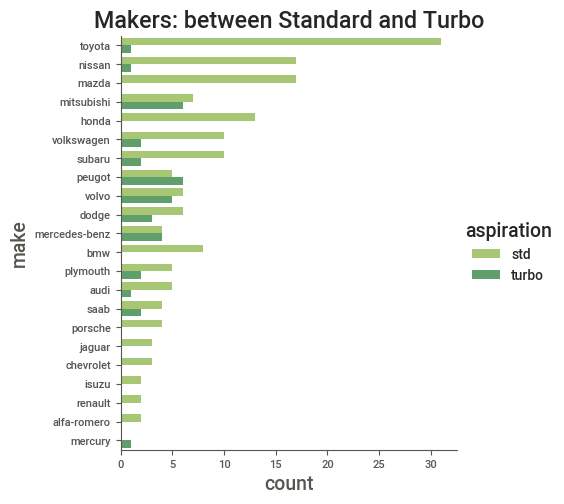

In [117]:
#  Car makers are Turbo aspiration
sns.catplot(y = 'make',data = data,kind = 'count',hue = 'aspiration',order = theorder,palette = 'summer_r')
plt.title("Makers: between Standard and Turbo");

- Two makers has higher utilizations of Turbo aspiration are 'peugot' and 'mitsubishi'

In [69]:
# num_of_doors
printing_info('num_of_doors')

		 Num_of_doors Column :


Unique Values
['two' 'four' '?']
Value Count
four    113
two      85
?         2
Name: num_of_doors, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: num_of_doors
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count      200
unique       3
top       four
freq       113
Name: num_of_doors, dtype: object


##### num-of-doors has 2 null values we'll fix it in data preprocessing pipeline

In [ ]:
#data.loc[data['num_of_doors']=='?']       
#data['num_of_doors'].replace('?',np.NaN,True)                                              
# data['num_of_doors']=data['num_of_doors'].fillna(data['num_of_doors'].mode())

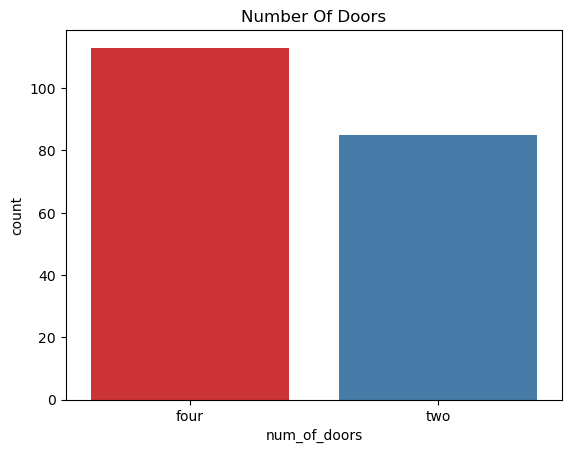

In [70]:
g = sns.countplot(x = 'num_of_doors',data = data,order = ['four','two'],palette = 'Set1')
g.set_title("Number Of Doors")
plt.show()

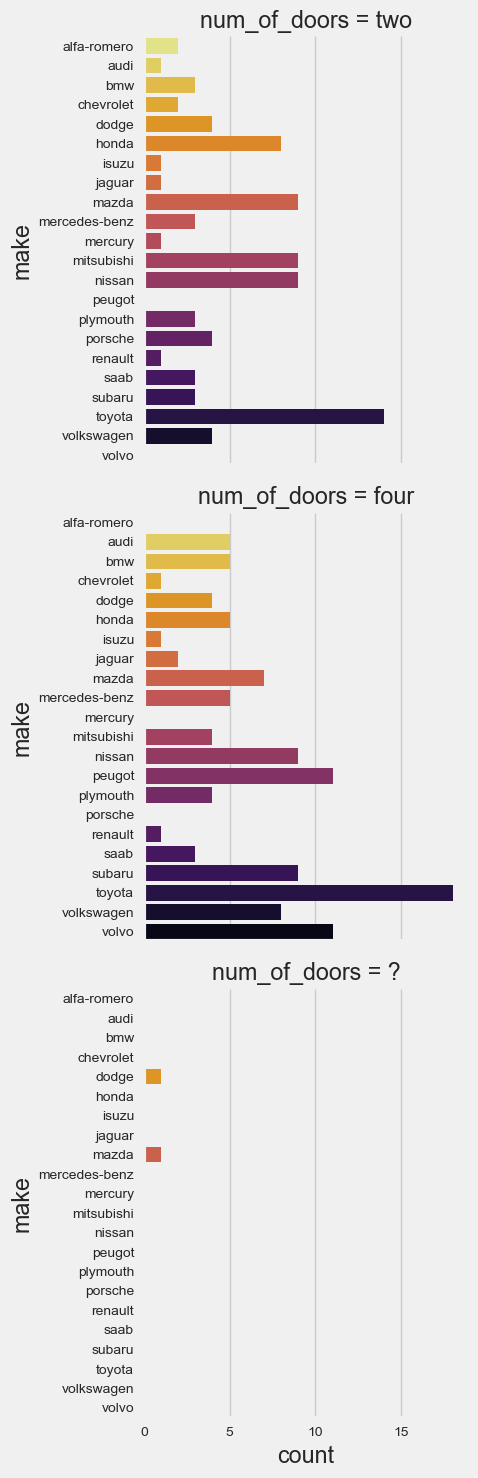

In [91]:
sns.catplot(y = 'make',data = data,kind = 'count',row = 'num_of_doors',palette = 'inferno_r')
plt.show()

##### - it give alot of insights here such 'volvo' has not cars with two doors in ourdata and 'mercury' has no cars with four doors!

 we wish to know if 'four doors' cars has more safety than other or not by symboling factor?

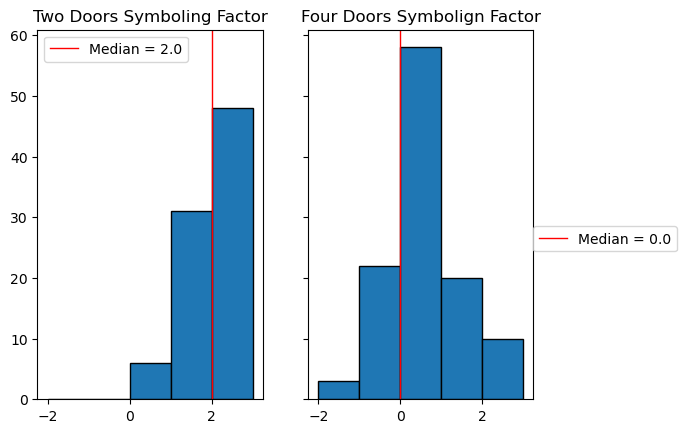

In [75]:
onee = data[data['num_of_doors']=='two']['symboling']
twoo = data[data['num_of_doors']=='four']['symboling']

binss = [int(x) for x in range(int(data['symboling'].min()),int(data['symboling'].max()+1),1)]
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols=2,sharex = True,sharey = True)

ax1.hist(x = onee,bins = binss, edgecolor = 'black')
ax2.hist(x = twoo,bins = binss, edgecolor = 'black')
ax1.set_title("Two Doors Symboling Factor")
ax2.set_title("Four Doors Symbolign Factor")

ax1.axvline(onee.median(), color='red', label=f"Median = {onee.median()}", linewidth=1)
# ax1.axvline(onee.mean(), color='green', label="Mean", linewidth=1)
ax2.axvline(twoo.median(), color='red', label=f"Median = {twoo.median()}", linewidth=1)
# ax2.axvline(twoo.mean(), color='green', label="Mean", linewidth=1)

ax1.legend()
ax2.legend(loc = [1,0.4])
plt.show()


##### The four doors has more safety average factor

In [76]:
# body_style
printing_info('body_style')

		 Body_style Column :


Unique Values
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Value Count
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: body_style, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: body_style
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count       200
unique        5
top       sedan
freq         94
Name: body_style, dtype: object


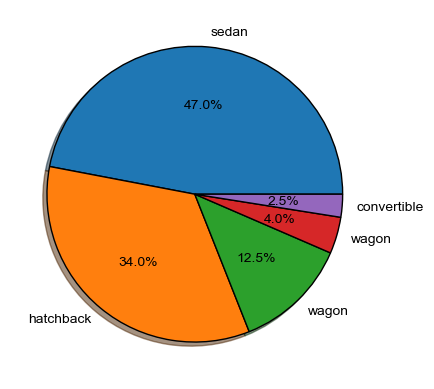

In [77]:
kinnd = [data['body_style'].value_counts()[0],data['body_style'].value_counts()[1],
         data['body_style'].value_counts()[2],data['body_style'].value_counts()[3],data['body_style'].value_counts()[4]]
laabbell = ['sedan' ,'hatchback', 'wagon','wagon','convertible']

plt.pie(kinnd , labels = laabbell , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
plt.style.use('seaborn')
plt.show()

#####  - Sedan and Hatchback are the most in our Data

 which body-style in two doors and which in four doors?

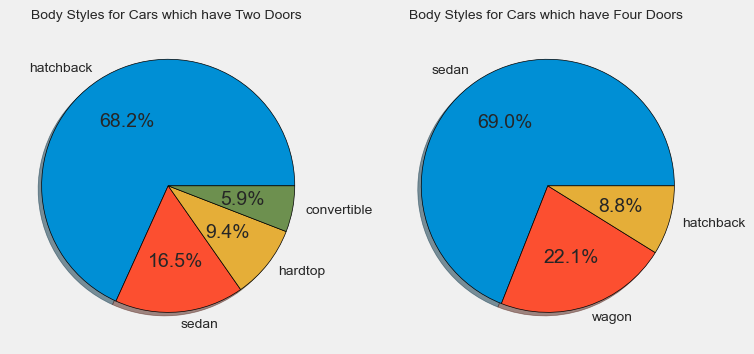

In [79]:
lab1 = data[data['num_of_doors'] == 'two']['body_style'].value_counts().index
kindd1 = data[data['num_of_doors'] == 'two']['body_style'].value_counts()

lab2 = data[data['num_of_doors'] == 'four']['body_style'].value_counts().index
kindd2 = data[data['num_of_doors'] == 'four']['body_style'].value_counts()

plt.style.use('fivethirtyeight')
fig,(ax1,ax2) =plt.subplots(nrows = 1,ncols = 2)

ax1.pie(kindd1 , labels = lab1 , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
# plt.style.use('seaborn')
ax2.pie(kindd2 , labels = lab2 , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
ax1.set_title("Body Styles for Cars which have Two Doors ",size = 10)
ax2.set_title("Body Styles for Cars which have Four Doors ",size = 10)

plt.show()

##### - Most Cars which have only Two Doors are in 'Hatchback' Style\

##### - But Most Cars which have four Doors are in 'Sedan' Style

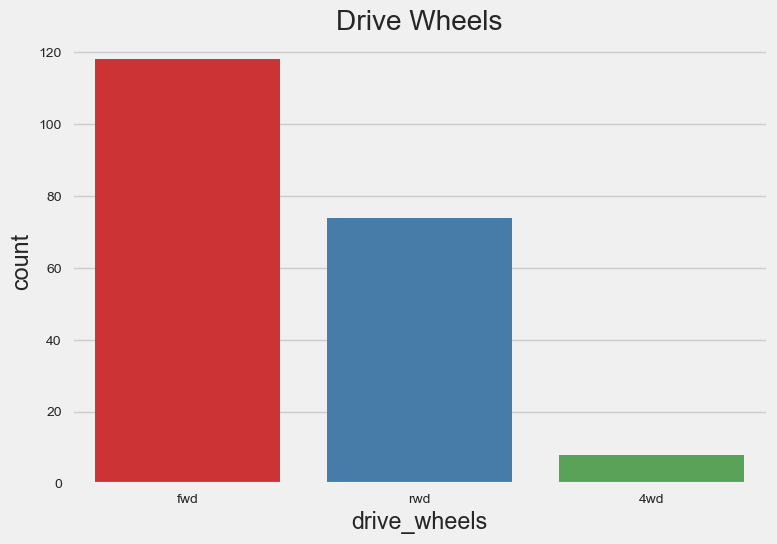

In [81]:
g = sns.countplot(x = 'drive_wheels',data = data,order = data['drive_wheels'].value_counts().index,palette = 'Set1')
g.set_title("Drive Wheels")
plt.show()

##### - most people drive Forward drive wheels followed by backward drive and wheels and lastly four wheels drive wheels 

Which of the three types of drive wheels has more safety than others?

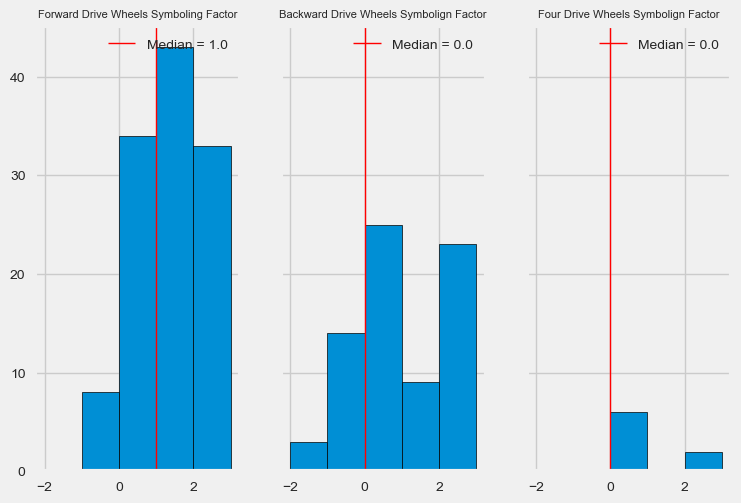

In [85]:
onee = data[data['drive_wheels']=='fwd']['symboling']
twoo = data[data['drive_wheels']=='rwd']['symboling']
three = data[data['drive_wheels']=='4wd']['symboling']


binss = [int(x) for x in range(-2,4,1)]
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 1,ncols=3,sharex = True,sharey = True)

ax1.hist(x = onee,bins = binss, edgecolor = 'black')
ax2.hist(x = twoo,bins = binss, edgecolor = 'black')
ax3.hist(x = three,bins = binss, edgecolor = 'black')


ax1.set_title("Forward Drive Wheels Symboling Factor",size = 8)
ax2.set_title("Backward Drive Wheels Symbolign Factor",size = 8)
ax3.set_title("Four Drive Wheels Symbolign Factor",size =8)


ax1.axvline(onee.median(), color='red', label=f"Median = {onee.median()}", linewidth=1)
ax2.axvline(twoo.median(), color='red', label=f"Median = {twoo.median()}", linewidth=1)
ax3.axvline(three.median(), color='red', label=f"Median = {three.median()}", linewidth=1)


ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

##### - Forward Drive wheels has less average safety\ BackWard Drive wheels has more safety!

In [86]:
# engine_location
printing_info('engine_location')

		 Engine_location Column :


Unique Values
['front' 'rear']
Value Count
front    197
rear       3
Name: engine_location, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: engine_location
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count       200
unique        2
top       front
freq        197
Name: engine_location, dtype: object


In [87]:
# wheel_base
printing_info('wheel_base')

		 Wheel_base Column :


Unique Values
[ 88.6  94.5  99.8  99.4 105.8 101.2 103.5 110.   88.4  93.7 103.3  95.9
  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7 115.6
  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2 107.9
 114.2 108.   89.5  96.1  99.1  93.3  97.   96.9  95.7  98.4 102.4 102.9
 104.5  97.3 104.3 109.1]
Value Count
93.7     20
94.5     19
95.7     13
96.5      8
97.3      7
107.9     6
104.3     6
100.4     6
99.1      6
96.3      6
98.4      6
98.8      6
109.1     5
102.4     5
97.2      5
93.1      5
95.9      5
114.2     4
95.3      4
101.2     4
97.0      4
110.0     3
89.5      3
105.8     3
103.5     3
99.8      2
96.1      2
91.3      2
113.0     2
102.9     2
96.9      2
115.6     2
86.6      2
104.9     2
104.5     2
103.3     2
93.3      1
88.6      1
108.0     1
99.2      1
95.1      1
93.0      1
102.7     1
120.9     1
96.6      1
106.7     1
102.0     1
96.0      1
94.3      1
88.4      1
99.4      1
112.0     1
Name: w

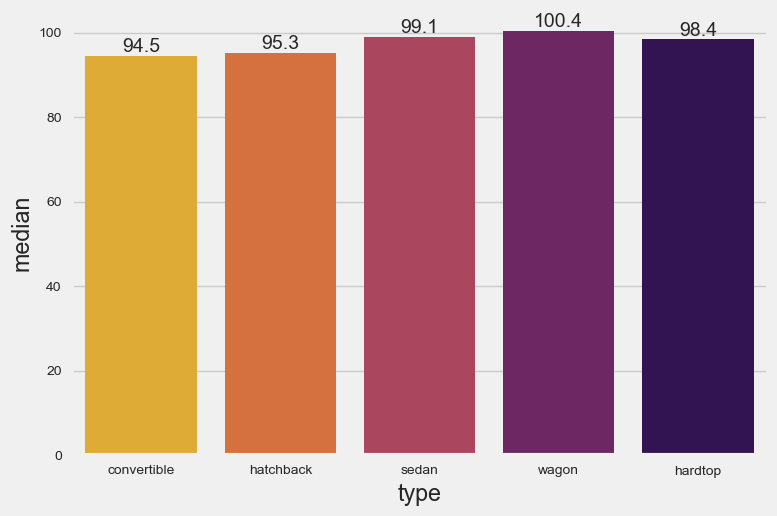

In [90]:
liss = {}
liss['type'] = data['body_style'].unique()
liss['median'] = []
for i in data['body_style'].unique():
    
    liss['median'].append(data[data['body_style']==i]['wheel_base'].median())

thedf = pd.DataFrame(liss)

a = sns.barplot(x='type',y = 'median',data =thedf,palette = 'inferno_r')
for i in a.containers:
    a.bar_label(i,)
plt.show()

##### - Wagon and Sedan has higher average wheel base among all style types

 which type of body style has higher average curb weight?

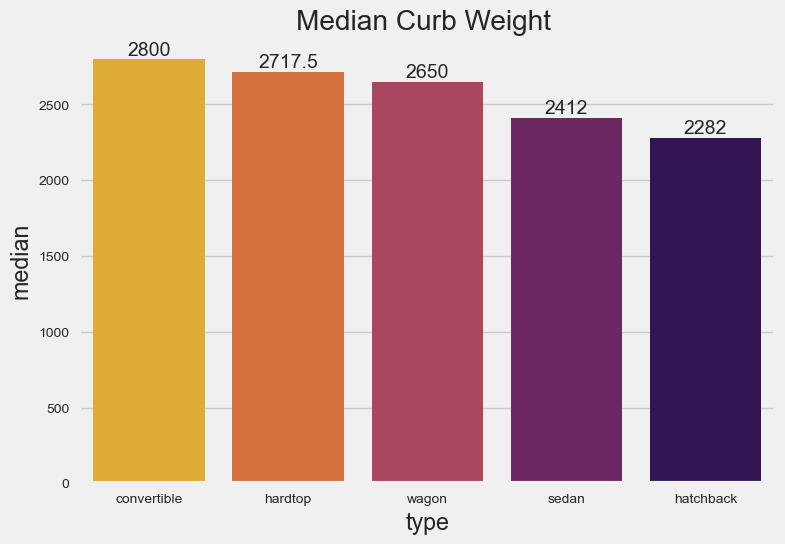

In [92]:
liss = {}
liss['type'] = data['body_style'].unique()
liss['median'] = []
for i in data['body_style'].unique():
    
    liss['median'].append(data[data['body_style']==i]['curb_weight'].median())

thedf = pd.DataFrame(liss)
thedf.sort_values(by ='median' ,ascending=False,inplace=True)
a = sns.barplot(x='type',y = 'median',data =thedf,palette = 'inferno_r')
for i in a.containers:
    a.bar_label(i,)
plt.title("Median Curb Weight ")
plt.show()

##### - convertible and hardtop have the highest average curb-weight

In [93]:
# engine_type
printing_info('engine_type')

		 Engine_type Column :


Unique Values
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
Value Count
ohc      145
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
Name: engine_type, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: engine_type
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count     200
unique      6
top       ohc
freq      145
Name: engine_type, dtype: object


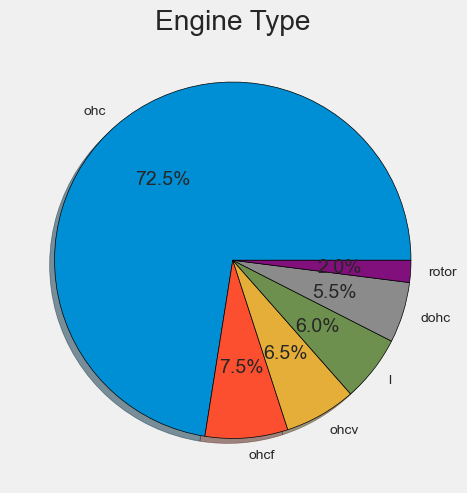

In [94]:
lab1 = data['engine_type'].value_counts().index
kindd1 = data['engine_type'].value_counts()

plt.pie(kindd1 , labels = lab1 , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
plt.title("Engine Type")
plt.show()

##### - our data consist of maximum ohc engine type

In [95]:
# num_of_cylinders
printing_info('num_of_cylinders')

		 Num_of_cylinders Column :


Unique Values
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Value Count
four      156
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: num_of_cylinders
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count      200
unique       7
top       four
freq       156
Name: num_of_cylinders, dtype: object


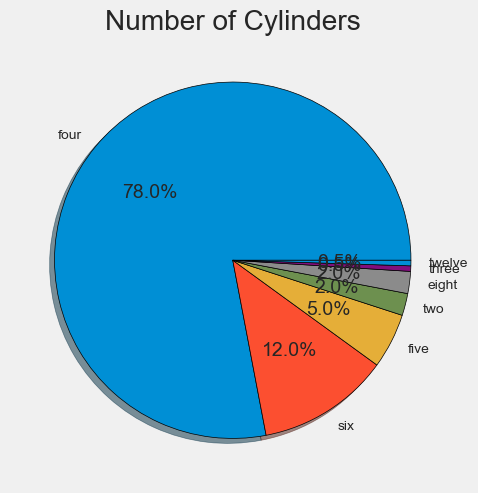

In [96]:
lab1 = data['num_of_cylinders'].value_counts().index
kindd1 = data['num_of_cylinders'].value_counts()

plt.pie(kindd1 , labels = lab1 , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
plt.title("Number of Cylinders")
plt.show()

In [99]:
#fuel_system
printing_info('fuel_system')

		 Fuel_system Column :


Unique Values
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Value Count
mpfi    91
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: fuel_system
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count      200
unique       8
top       mpfi
freq        91
Name: fuel_system, dtype: object


C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


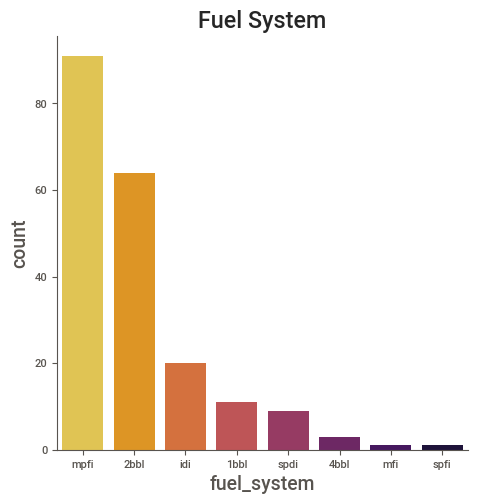

In [107]:
sns.catplot('fuel_system',data =data,order=data['fuel_system'].value_counts().index,kind = 'count',palette = 'inferno_r')
plt.title("Fuel System")
plt.show()

In [101]:
# bore
printing_info('bore')

		 Bore Column :


Unique Values
['3.47' '2.68' '3.19' '3.13' '3.50' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.60' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' '?' '3.39' '3.76'
 '3.58' '3.46' '3.80' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.70'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01']
Value Count
3.62    23
3.19    20
3.15    15
2.97    12
3.03    10
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.70     5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.24     2
3.63     2
3.50     2
3.80     2
3.33     2
3.08     1
3.94     1
3.13     1
2.54     1
2.99     1
3.61     1
3.34     1
3.60     1
2.92     1
3.76     1
2.68     1
3.47     1
Name: bore, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: bore
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
cou

 Is stroke increasing with bore diameter?

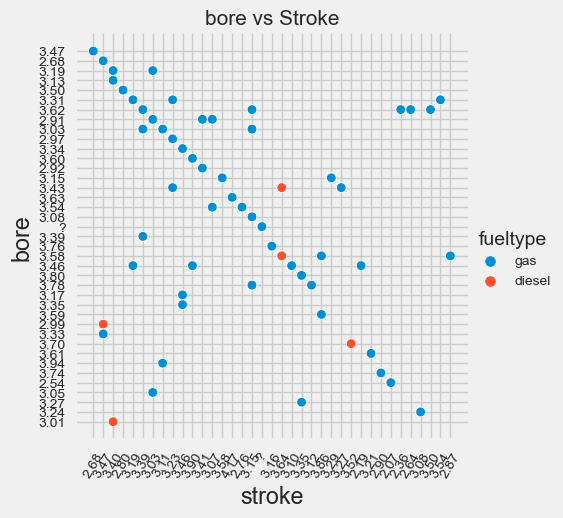

In [105]:
sns.relplot(x='stroke',y='bore',data =data,kind ='scatter',hue = 'fueltype')
plt.title("bore vs Stroke",size = 15)
plt.xticks(rotation=60)
plt.show()

##### - bore diameter and stroke are inversely proportional to eachother

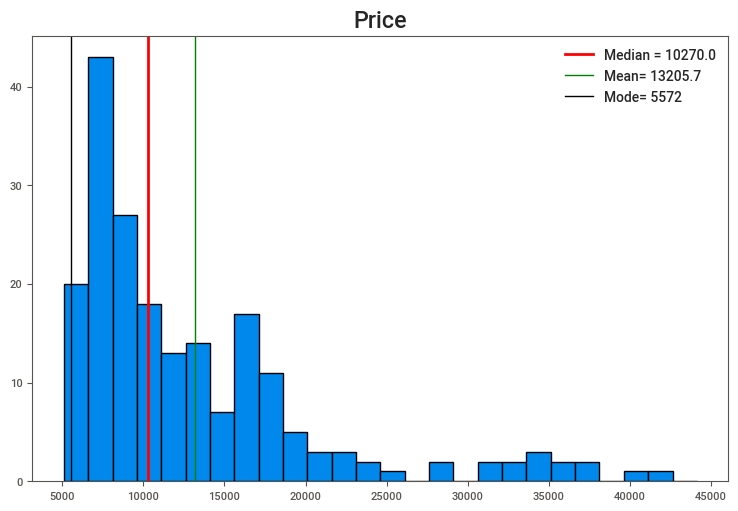

In [119]:
# price

data['price']=data['price'].astype(int)
onee = data['price']

binss = [int(x) for x in range(int(data['price'].min()),int(data['price'].max()+1),1500)]
fig,(ax1) = plt.subplots(nrows = 1,ncols=1,sharex = True,sharey = True)

ax1.hist(x = onee,bins = binss, edgecolor = 'black')

ax1.set_title("Price")


ax1.axvline(onee.median()-5, color='red', label=f"Median = {onee.median()}", linewidth=2)
ax1.axvline(onee.mean()+10, color='green', label=f"Mean= {onee.mean():.6}".format(), linewidth=1)
ax1.axvline(onee.mode()[0], color='black', label=f"Mode= {onee.mode()[0]}", linewidth=1)

ax1.legend()
plt.show()

In [120]:
data[data['price']==data['price'].max()]

,symboling,normalized_losses,make,fueltype,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
70,1,115.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400


##### - Mercedes-benz is the most expensive model according to the data

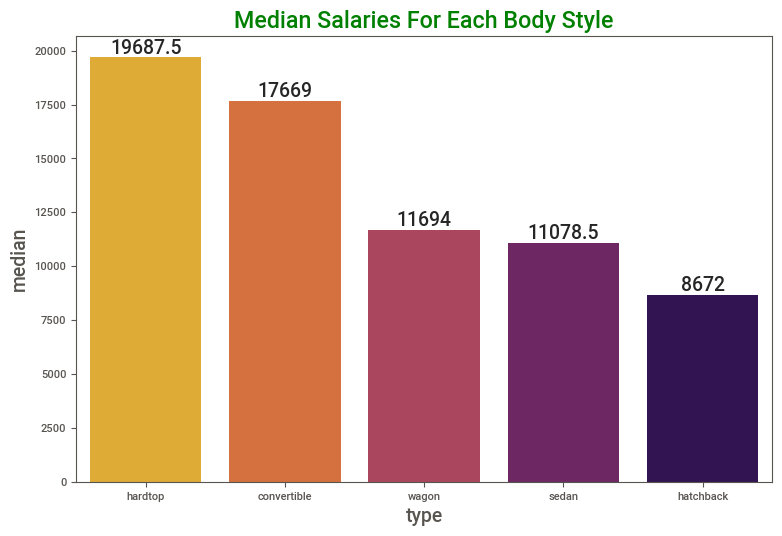

In [122]:
liss = {}
liss['type'] = data['body_style'].unique()
liss['median'] = []
for i in data['body_style'].unique():
    
    liss['median'].append(data[data['body_style']==i]['price'].median())

thedf = pd.DataFrame(liss)
thedf.sort_values(by ='median' ,ascending=False,inplace=True)
a = sns.barplot(x='type',y = 'median',data =thedf,palette = 'inferno_r')
for i in a.containers:
    a.bar_label(i,)
plt.title("Median Salaries For Each Body Style",color='green')
plt.show()

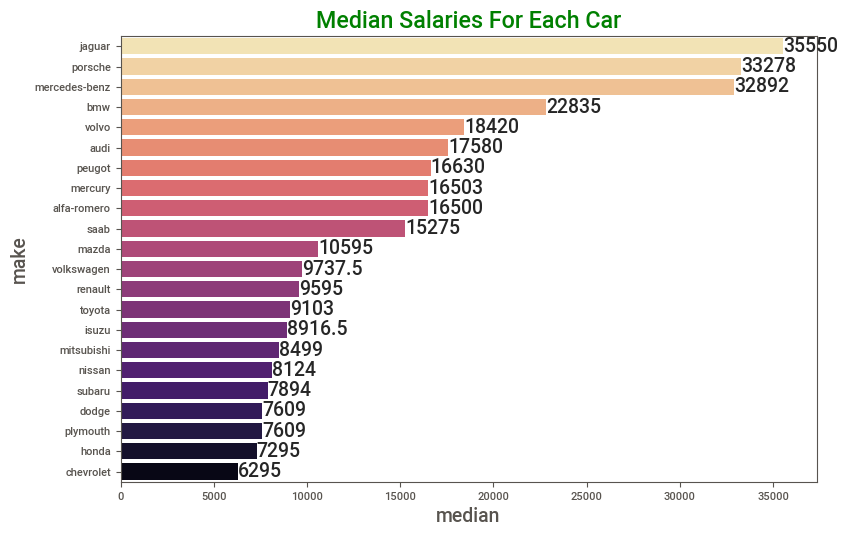

In [123]:
liss = {}
liss['make'] = data['make'].unique()
liss['median'] = []
for i in data['make'].unique():
    
    liss['median'].append(data[data['make']==i]['price'].median())

thedf = pd.DataFrame(liss)
thedf.sort_values(by ='median' ,ascending=False,inplace=True)
a = sns.barplot(y='make',x = 'median',data =thedf,palette = 'magma_r')
for i in a.containers:
    a.bar_label(i,)
plt.title("Median Salaries For Each Car",color='green')
plt.show()

##### - Higher Salaries is on side ["Jaguar","Porsche","Marcedes"] and lower on side ["Chevrolet","Dodge","Honda"]

In [106]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


1. Symboling : 32% of the cars have 0 Symboling that is they have moderate safety, 13% of the cars are at high safety risk.12

2. Normalized_losses :18% of the data is not known, which is high in percentage in compare with other values.It is continuous data with values in the range 65 to 256.

3. Make : from Make Column we conclude that the 3 Top Makers are:
toyote with 16% of the cars,nissan with 9% and mazda with 8%.Other brands are below 7%.

4. Fueltype : fueltype with 2 distinct values gas and diesel.
90% of the cars belong to gas fuel type and 10% of tye cars belong to dis=esel fuel type.

5. Aspiration :Aspiration with 2 distinct values std and turbo.
Where 82% of the cars has std aspiration

6. num_of_doors : 56% of the cars habe four number of doors and 42% has two. 1% of the data is unknown.

7. Body_style : 47% of the cars has sedan style body, 34% has hatchback body style,12%, 4% and 2% of the car has wagon, hardtop and covertible body style respectvely.

8. drive_wheels : In 59% of the cars power from the engine is delivered to the front wheels(fwd), 37% of the cars are rwd derive wheel, in which the engine drives the rear wheels only. Whereas only 4% of the cars are 4wd where the power from the engine is delivered to all 4 wheels 
   
9. Engine location: 98% of the cars engine is located at the front, and 2% at rear.

10. Wheel base :It is a numerical data  having  positive skew of 1.05, with 52 distinct values in a range of 86 to 120. The data show 0.965 of kurtosis.

11. Length :It is a numerical data  having  positive skew of 0.148, with 73 distinct values in a range of 141.1 to 208.1  The data show -0.076 of kurtosis.

12. width : It is a numerical data  having  positive skew of 0.868, with 43 distinct values in a range of 60.3 to 72.0 . The data show 0.670 of kurtosis.

13. height :It is a numerical data  having  positive skew of 1.05, with 49 distinct values in a range of 86 to 120. The data show 0.965 of kurtosis.

12% of the cars are pretty safe.

In [109]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fueltype', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [112]:
data.head(2)

,symboling,normalized_losses,make,fueltype,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


## Data preprocessing pipeline

In [20]:
data.head()

,symboling,normalized_losses,make,fueltype,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### converting categorical data to numerical

#### Make

In [21]:
len(data.make.unique())

22

In [22]:
data.make=data.make.map({'alfa-romero':1, 'audi':2, 'bmw':3, 'chevrolet':4, 'dodge':5, 'honda':6,
       'isuzu':7, 'jaguar':8, 'mazda':9, 'mercedes-benz':10, 'mercury':11,
       'mitsubishi':12, 'nissan':13, 'peugot':14, 'plymouth':15, 'porsche':16, 'renault':17,
       'saab':18, 'subaru':19, 'toyota':20, 'volkswagen':21, 'volvo':22})

In [23]:
data.make.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

#### Fueltype

In [24]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [25]:
df1=pd.get_dummies(data['fueltype'],prefix='fueltype',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['fueltype'],axis=1)

In [26]:
data.head(2)

,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas
0,3,?,1,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1
1,1,?,1,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1


#### aspiration

In [27]:
data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [28]:
df1=pd.get_dummies(data['aspiration'],prefix='aspiration',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['aspiration'],axis=1)

In [29]:
data.head(2)

,symboling,normalized_losses,make,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo
0,3,?,1,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500,1,0
1,1,?,1,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500,1,0


#### num_of_doors

In [30]:
data.num_of_doors.unique()

array(['two', 'four', '?'], dtype=object)

In [31]:
data.num_of_doors.value_counts()

four    113
two      85
?         2
Name: num_of_doors, dtype: int64

In [32]:
data['num_of_doors'].replace('?',np.NaN,True)

In [33]:
data.loc[data['num_of_doors'].isnull()==True,'num_of_doors']='four'

In [34]:
data.num_of_doors.unique()

array(['two', 'four'], dtype=object)

In [35]:
df1=pd.get_dummies(data['num_of_doors'],prefix='num_of_doors',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['num_of_doors'],axis=1)

In [36]:
data.head(2)

,symboling,normalized_losses,make,body_style,drive_wheels,engine_location,wheel_base,length,width,height,...,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two
0,3,?,1,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500,1,0,1
1,1,?,1,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500,1,0,1


#### body_style

In [37]:
data.body_style.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [38]:
data.body_style.value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: body_style, dtype: int64

In [39]:
data.body_style=data.body_style.map({'convertible':5, 'hatchback':2, 'sedan':1, 'wagon':3, 'hardtop':4})
print(data.body_style.unique())

[5 2 1 3 4]


In [40]:
data.head(2)

,symboling,normalized_losses,make,body_style,drive_wheels,engine_location,wheel_base,length,width,height,...,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two
0,3,?,1,5,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500,1,0,1
1,1,?,1,2,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500,1,0,1


#### drive_wheels

In [41]:
data.drive_wheels.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [42]:
data.drive_wheels.value_counts()

fwd    118
rwd     74
4wd      8
Name: drive_wheels, dtype: int64

In [43]:
data.drive_wheels=data.drive_wheels.map({'rwd':2, 'fwd':1, '4wd':3})

In [44]:
data.drive_wheels.unique()

array([2, 1, 3], dtype=int64)

In [45]:
data.head(1)

,symboling,normalized_losses,make,body_style,drive_wheels,engine_location,wheel_base,length,width,height,...,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two
0,3,?,1,5,2,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500,1,0,1


#### engine_location

In [46]:
data.engine_location.unique()

array(['front', 'rear'], dtype=object)

In [47]:
df1=pd.get_dummies(data['engine_location'],prefix='engine_location',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['engine_location'],axis=1)

In [48]:
data.head(2)

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,?,1,5,2,88.6,168.8,64.1,48.8,2548,...,9.0,111,5000,21,27,16500,1,0,1,0
1,1,?,1,2,2,94.5,171.2,65.5,52.4,2823,...,9.0,154,5000,19,26,16500,1,0,1,0


#### engine_type

In [49]:
pd.set_option('display.max_columns', None)

In [50]:
data.head(2)

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,?,1,5,2,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0
1,1,?,1,2,2,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0


In [51]:
data.engine_type.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [52]:
data.engine_type.value_counts()

ohc      145
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
Name: engine_type, dtype: int64

In [53]:
data.engine_type=data.engine_type.map({'dohc':5, 'ohcv':3, 'ohc':1, 'l':4, 'rotor':6, 'ohcf':2})

In [54]:
data.head(2)

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,?,1,5,2,88.6,168.8,64.1,48.8,2548,5,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0
1,1,?,1,2,2,94.5,171.2,65.5,52.4,2823,3,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0


#### num_of_cylinders

In [55]:
data.num_of_cylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [56]:
data.num_of_cylinders.value_counts()

four      156
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [57]:
data.num_of_cylinders=data.num_of_cylinders.map({'four':1, 'six':2, 'five':3, 'three':6, 'twelve':7, 'two':4, 'eight':5})

In [58]:
data.head(2)

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,?,1,5,2,88.6,168.8,64.1,48.8,2548,5,1,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0
1,1,?,1,2,2,94.5,171.2,65.5,52.4,2823,3,2,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0


#### fuel_system

In [59]:
data.fuel_system.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [60]:
data.fuel_system.value_counts()

mpfi    91
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

In [61]:
data.fuel_system=data.fuel_system.map({'mpfi':1, '2bbl':2, 'mfi':7, '1bbl':4, 'spfi':8, '4bbl':6, 'idi':3, 'spdi':5})

In [62]:
data.head(2)

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,?,1,5,2,88.6,168.8,64.1,48.8,2548,5,1,130,1,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0
1,1,?,1,2,2,94.5,171.2,65.5,52.4,2823,3,2,152,1,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0


#### normalized_losses

normalized_losses has some null values lets handle them

In [63]:
data.normalized_losses.unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [64]:
data.loc[data['normalized_losses']=='?']

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,?,1,5,2,88.6,168.8,64.1,48.8,2548,5,1,130,1,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0
1,1,?,1,2,2,94.5,171.2,65.5,52.4,2823,3,2,152,1,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0
4,2,?,2,1,1,99.8,177.3,66.3,53.1,2507,1,3,136,1,3.19,3.40,8.5,110,5500,19,25,15250,1,0,1,0
6,1,?,2,3,1,105.8,192.7,71.4,55.7,2954,1,3,136,1,3.19,3.40,8.5,110,5500,19,25,18920,1,0,0,0
12,1,?,3,1,2,103.5,189.0,66.9,55.7,3055,1,2,164,1,3.31,3.19,9.0,121,4250,20,25,24565,1,0,0,0
13,0,?,3,1,2,103.5,189.0,66.9,55.7,3230,1,2,209,1,3.62,3.39,8.0,182,5400,16,22,30760,1,0,0,0
14,0,?,3,1,2,103.5,193.8,67.9,53.7,3380,1,2,209,1,3.62,3.39,8.0,182,5400,16,22,41315,1,0,1,0
15,0,?,3,1,2,110.0,197.0,70.9,56.3,3505,1,2,209,1,3.62,3.39,8.0,182,5400,15,20,36880,1,0,0,0
41,0,?,7,1,2,94.3,170.7,61.8,53.5,2337,1,1,111,2,3.31,3.23,8.5,78,4800,24,29,6785,1,0,0,0
42,2,?,7,2,2,96.0,172.6,65.2,51.4,2734,1,1,119,8,3.43,3.23,9.2,90,5000,24,29,11048,1,0,1,0


In [65]:
data['normalized_losses'].replace('?',np.NaN,True)

In [66]:
data['normalized_losses']=data['normalized_losses'].fillna(data['normalized_losses'].median())

In [67]:
data.normalized_losses.unique()

array([115.0, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [68]:
data.head()

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,115.0,1,5,2,88.6,168.8,64.1,48.8,2548,5,1,130,1,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0
1,1,115.0,1,2,2,94.5,171.2,65.5,52.4,2823,3,2,152,1,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0
2,2,164,2,1,1,99.8,176.6,66.2,54.3,2337,1,1,109,1,3.19,3.40,10.0,102,5500,24,30,13950,1,0,0,0
3,2,164,2,1,3,99.4,176.6,66.4,54.3,2824,1,3,136,1,3.19,3.40,8.0,115,5500,18,22,17450,1,0,0,0
4,2,115.0,2,1,1,99.8,177.3,66.3,53.1,2507,1,3,136,1,3.19,3.40,8.5,110,5500,19,25,15250,1,0,1,0


#### bore

In [69]:
data.loc[data['bore']=='?']

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
51,3,150,9,2,2,95.3,169.0,65.7,49.6,2380,6,4,70,6,?,?,9.4,101,6000,17,23,10945,1,0,1,0
52,3,150,9,2,2,95.3,169.0,65.7,49.6,2380,6,4,70,6,?,?,9.4,101,6000,17,23,11845,1,0,1,0
53,3,150,9,2,2,95.3,169.0,65.7,49.6,2385,6,4,70,6,?,?,9.4,101,6000,17,23,13645,1,0,1,0
54,3,150,9,2,2,95.3,169.0,65.7,49.6,2500,6,4,80,1,?,?,9.4,135,6000,16,23,15645,1,0,1,0


In [70]:
data.bore.unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [71]:
data['bore'].replace('?',np.NaN,True)

In [72]:
data['bore']=data['bore'].fillna(data['bore'].median())

In [73]:
data.bore.unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', 3.31, '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [74]:
data.head(2)

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,115.0,1,5,2,88.6,168.8,64.1,48.8,2548,5,1,130,1,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0
1,1,115.0,1,2,2,94.5,171.2,65.5,52.4,2823,3,2,152,1,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0


#### stroke

In [75]:
data.loc[data['stroke']=='?']

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
51,3,150,9,2,2,95.3,169.0,65.7,49.6,2380,6,4,70,6,3.31,?,9.4,101,6000,17,23,10945,1,0,1,0
52,3,150,9,2,2,95.3,169.0,65.7,49.6,2380,6,4,70,6,3.31,?,9.4,101,6000,17,23,11845,1,0,1,0
53,3,150,9,2,2,95.3,169.0,65.7,49.6,2385,6,4,70,6,3.31,?,9.4,101,6000,17,23,13645,1,0,1,0
54,3,150,9,2,2,95.3,169.0,65.7,49.6,2500,6,4,80,1,3.31,?,9.4,135,6000,16,23,15645,1,0,1,0


In [76]:
data['stroke'].replace('?',np.NaN,True)

In [77]:
data['stroke']=data['stroke'].fillna(data['stroke'].median())

In [78]:
data.stroke.unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', 3.29, '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [79]:
data.head(2)

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,115.0,1,5,2,88.6,168.8,64.1,48.8,2548,5,1,130,1,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0
1,1,115.0,1,2,2,94.5,171.2,65.5,52.4,2823,3,2,152,1,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0


#### horsepower

In [80]:
data.loc[data['horsepower']=='?']

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
125,0,115.0,17,3,1,96.1,181.5,66.5,55.2,2579,1,1,132,1,3.46,3.90,8.7,?,?,23,31,9295,1,0,0,0
126,2,115.0,17,2,1,96.1,176.8,66.6,50.5,2460,1,1,132,1,3.46,3.90,8.7,?,?,23,31,9895,1,0,1,0


In [81]:
data['horsepower'].replace('?',np.NaN,True)

In [82]:
data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())

In [83]:
data.horsepower.unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', 95.0, '73', '82', '94', '62', '56', '112',
       '92', '161', '156', '52', '85', '114', '162', '134', '106'],
      dtype=object)

In [84]:
data.head(2)

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,115.0,1,5,2,88.6,168.8,64.1,48.8,2548,5,1,130,1,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0
1,1,115.0,1,2,2,94.5,171.2,65.5,52.4,2823,3,2,152,1,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0


#### peak_rpm

In [85]:
data.loc[data['peak_rpm']=='?']

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
125,0,115.0,17,3,1,96.1,181.5,66.5,55.2,2579,1,1,132,1,3.46,3.90,8.7,95.0,?,23,31,9295,1,0,0,0
126,2,115.0,17,2,1,96.1,176.8,66.6,50.5,2460,1,1,132,1,3.46,3.90,8.7,95.0,?,23,31,9895,1,0,1,0


In [86]:
data['peak_rpm'].replace('?',np.NaN,True)

In [87]:
data['peak_rpm']=data['peak_rpm'].fillna(data['peak_rpm'].median())

In [88]:
data.peak_rpm.unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', 5200.0, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

### handling outliers

In [89]:
data.head(2)

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,115.0,1,5,2,88.6,168.8,64.1,48.8,2548,5,1,130,1,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0
1,1,115.0,1,2,2,94.5,171.2,65.5,52.4,2823,3,2,152,1,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0


In [90]:
data.normalized_losses.unique()

array([115.0, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


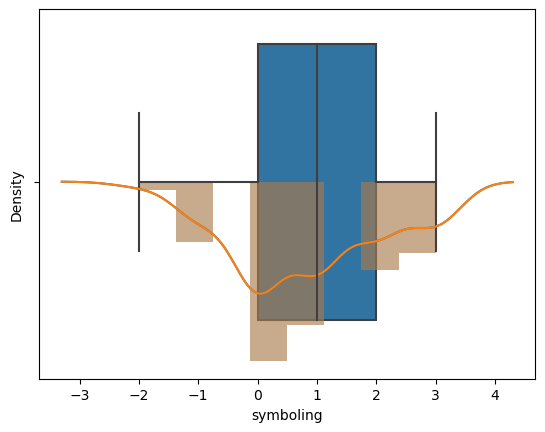

In [93]:
sns.distplot(data.symboling)
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


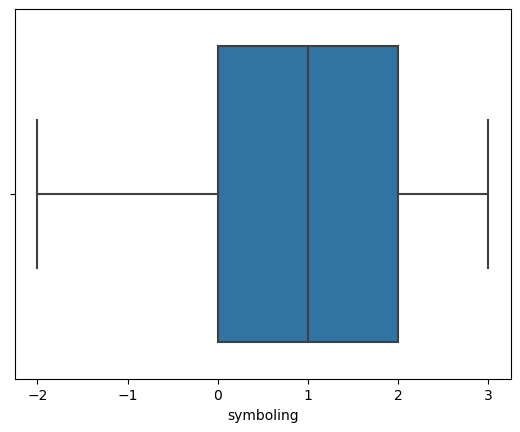

In [94]:
sns.boxplot(data.symboling)
plt.show()

#### normalized_losses

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


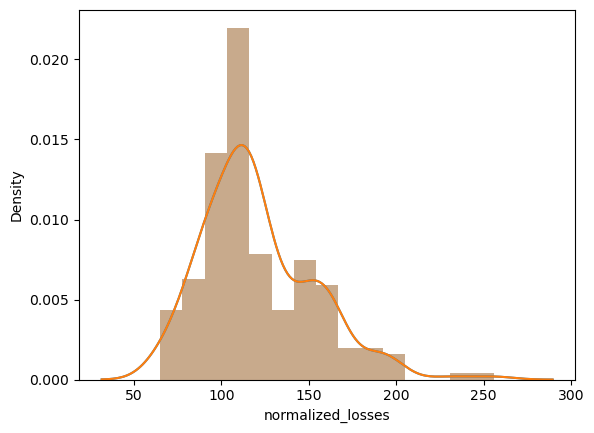

In [96]:
sns.distplot(data.normalized_losses)
plt.show()

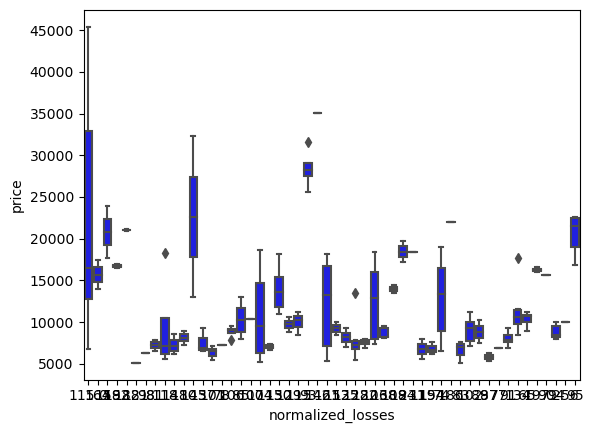

In [97]:
plot = sns.boxplot(
    color='blue',
    # use your orientation command here
    x=data["normalized_losses"], 
    y=data["price"] 
);
plt.show()

In [98]:
data['normalized_losses']=pd.to_numeric(data.normalized_losses,downcast='float')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             200 non-null    int64  
 1   normalized_losses     200 non-null    float32
 2   make                  200 non-null    int64  
 3   body_style            200 non-null    int64  
 4   drive_wheels          200 non-null    int64  
 5   wheel_base            200 non-null    float64
 6   length                200 non-null    float64
 7   width                 200 non-null    float64
 8   height                200 non-null    float64
 9   curb_weight           200 non-null    int64  
 10  engine_type           200 non-null    int64  
 11  num_of_cylinders      200 non-null    int64  
 12  engine_size           200 non-null    int64  
 13  fuel_system           200 non-null    int64  
 14  bore                  200 non-null    object 
 15  stroke                2

In [100]:
from scipy import stats

IQR=stats.iqr(data.normalized_losses,interpolation='midpoint')
IQR

40.0

In [101]:
Q1=data.normalized_losses.quantile(0.25)
Q3=data.normalized_losses.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [102]:
data.loc[data['normalized_losses']>max_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
102,1,231.0,13,2,2,99.2,178.5,67.9,49.7,3139,3,2,181,1,3.43,3.27,9.0,160,5200,19,25,18399,1,0,1,0
185,3,256.0,21,2,1,94.5,165.7,64.0,51.4,2221,1,1,109,1,3.19,3.40,8.5,90,5500,24,29,9980,1,0,1,0


In [103]:
data.loc[data['normalized_losses']<min_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear


In [104]:
data.loc[data['normalized_losses']>max_limit,'normalized_losses']=np.median(data.normalized_losses)

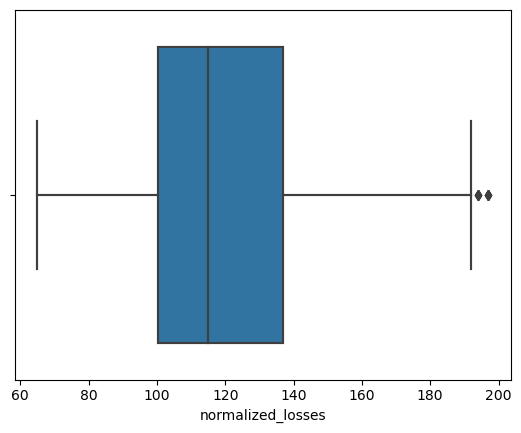

In [106]:
sns.boxplot(x=data.normalized_losses)
plt.show()

#### wheel_base

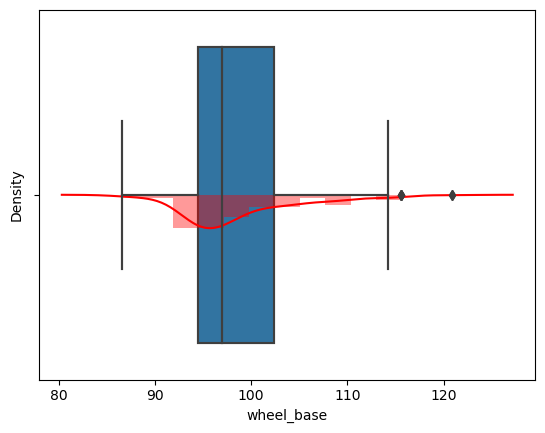

In [109]:
sns.boxplot(x=data.wheel_base)
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


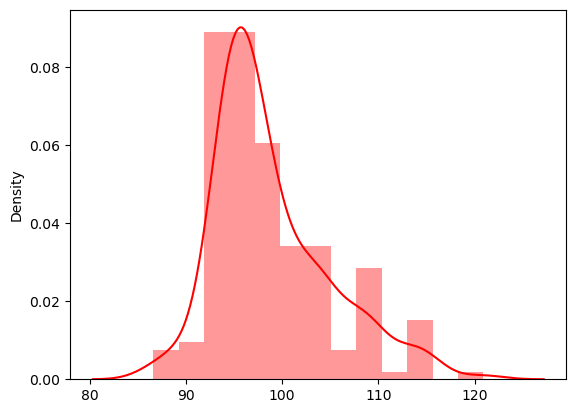

In [111]:
sns.distplot(x=data.wheel_base,color='red')
plt.show()

In [112]:
from scipy import stats

IQR=stats.iqr(data.wheel_base,interpolation='midpoint')
IQR

7.900000000000006

In [113]:
Q1=data.wheel_base.quantile(0.25)
Q3=data.wheel_base.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [114]:
data.loc[data['wheel_base']>max_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
66,-1,93.0,10,1,2,115.6,202.6,71.7,56.3,3770,1,3,183,3,3.58,3.64,21.5,123,4350,22,25,31600,0,1,0,0
67,-1,115.0,10,1,2,115.6,202.6,71.7,56.5,3740,3,5,234,1,3.46,3.10,8.3,155,4750,16,18,34184,1,0,0,0
69,0,115.0,10,1,2,120.9,208.1,71.7,56.7,3900,3,5,308,1,3.80,3.35,8.0,184,4500,14,16,40960,1,0,0,0


In [115]:
data.loc[data['wheel_base']>max_limit,'wheel_base']=np.median(data.wheel_base)

#### length

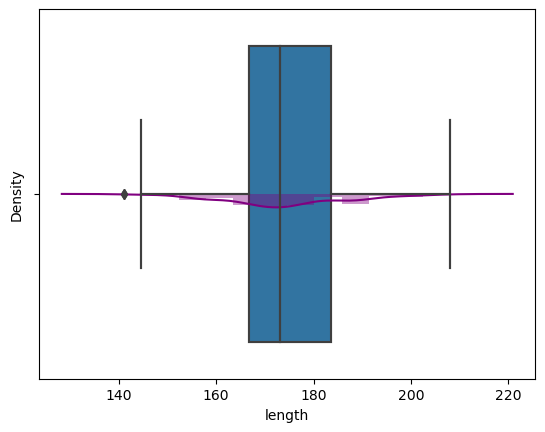

In [118]:
sns.boxplot(x=data.length)
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


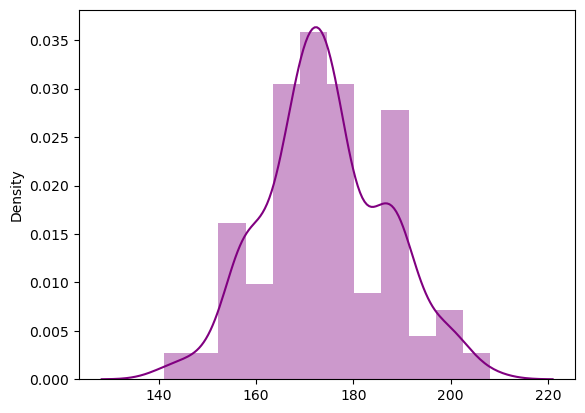

In [119]:
sns.distplot(x=data.length,color='purple')
plt.show()

In [120]:
IQR=stats.iqr(data.length,interpolation='midpoint')
IQR

16.94999999999999

In [121]:
Q1=data.length.quantile(0.25)
Q3=data.length.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [122]:
data.loc[data['length']<min_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
16,2,121.0,4,2,1,88.4,141.1,60.3,53.2,1488,4,6,61,2,2.91,3.03,9.5,48,5100,47,53,5151,1,0,1,0


In [123]:
data.loc[data['length']>max_limit,'length']=np.median(data.length)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


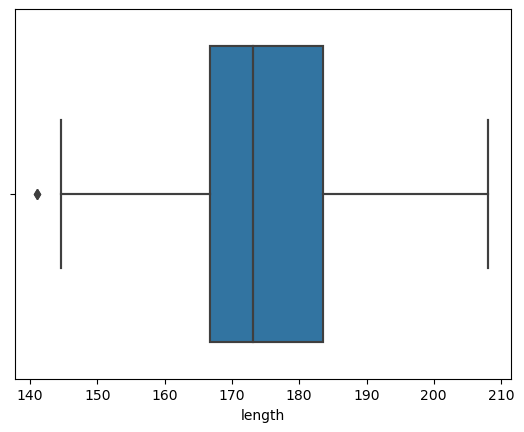

In [125]:
sns.boxplot(data.length)
plt.show()

#### width

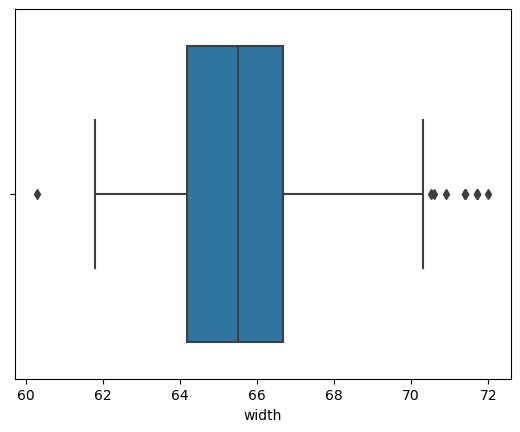

In [126]:
sns.boxplot(x=data.width)
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


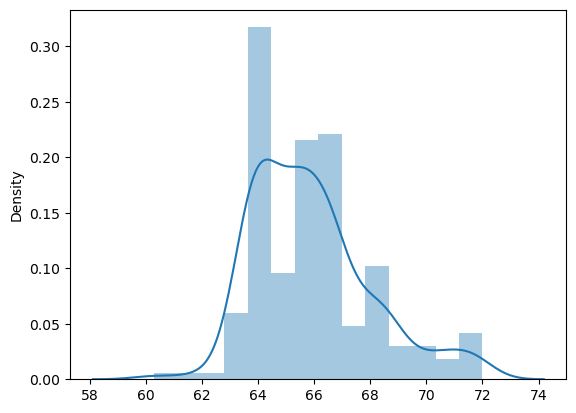

In [127]:
sns.distplot(x=data.width)
plt.show()

In [128]:
IQR=stats.iqr(data.width,interpolation='midpoint')
IQR

2.5999999999999943

In [129]:
Q1=data.width.quantile(0.25)
Q3=data.width.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [130]:
data.loc[data['width']<min_limit]
data.loc[data['width']>max_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
5,1,158.0,2,1,1,105.8,192.7,71.4,55.7,2844,1,3,136,1,3.19,3.40,8.5,110,5500,19,25,17710,1,0,0,0
6,1,115.0,2,3,1,105.8,192.7,71.4,55.7,2954,1,3,136,1,3.19,3.40,8.5,110,5500,19,25,18920,1,0,0,0
7,1,158.0,2,1,1,105.8,192.7,71.4,55.9,3086,1,3,131,1,3.13,3.40,8.3,140,5500,17,20,23875,1,1,0,0
15,0,115.0,3,1,2,110.0,197.0,70.9,56.3,3505,1,2,209,1,3.62,3.39,8.0,182,5400,15,20,36880,1,0,0,0
45,0,115.0,8,1,2,102.0,191.7,70.6,47.8,3950,3,7,326,1,3.54,2.76,11.5,262,5000,13,17,36000,1,0,1,0
66,-1,93.0,10,1,2,97.0,202.6,71.7,56.3,3770,1,3,183,3,3.58,3.64,21.5,123,4350,22,25,31600,0,1,0,0
67,-1,115.0,10,1,2,97.0,202.6,71.7,56.5,3740,3,5,234,1,3.46,3.10,8.3,155,4750,16,18,34184,1,0,0,0
69,0,115.0,10,1,2,97.0,208.1,71.7,56.7,3900,3,5,308,1,3.80,3.35,8.0,184,4500,14,16,40960,1,0,0,0
70,1,115.0,10,4,2,112.0,199.2,72.0,55.4,3715,3,5,304,1,3.80,3.35,8.0,184,4500,14,16,45400,1,0,1,0


In [131]:
len(data.loc[data['width']<min_limit])

0

In [132]:
len(data.loc[data['width']>max_limit])

9

In [133]:
data.shape[0]
len(data.loc[data['width']>max_limit]) #### wrong
9/200*100

4.5

In [134]:
data.loc[data['width']>max_limit,'width']=np.median(data.width)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


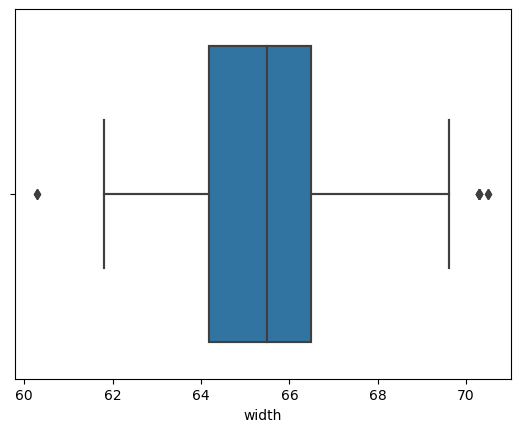

In [136]:
sns.boxplot(data.width)
plt.show()

#### height

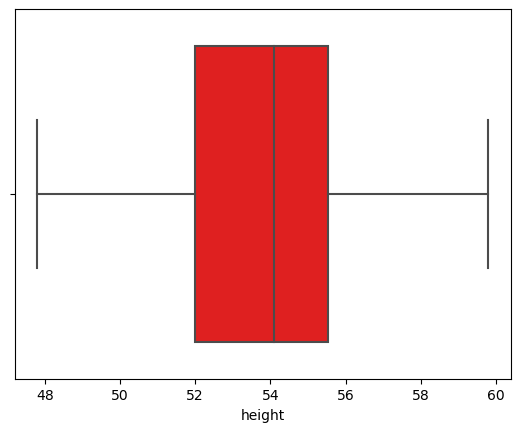

In [137]:
sns.boxplot(x=data.height,color='red')
plt.show()

#### curb_weight

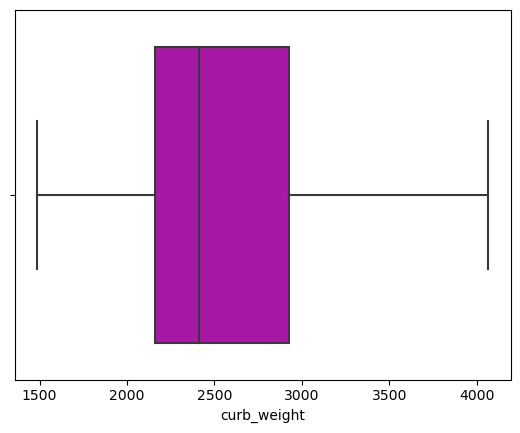

In [139]:
sns.boxplot(x=data.curb_weight,color='m')
plt.show()

#### engine_size

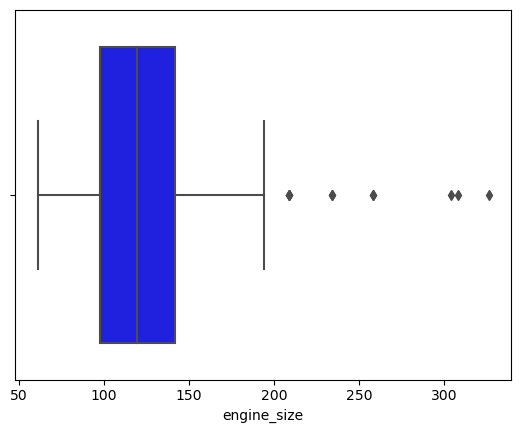

In [140]:
sns.boxplot(x=data.engine_size,color='b')
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


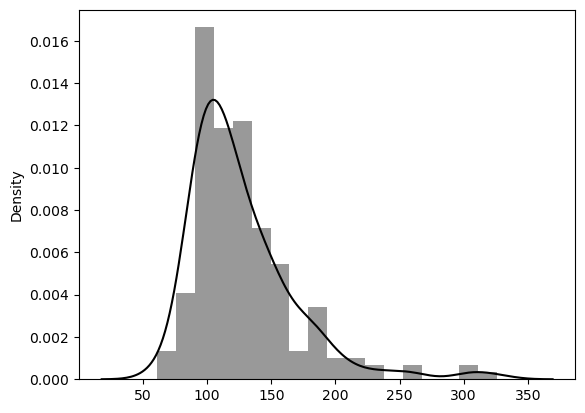

In [142]:
sns.distplot(x=data.engine_size,color='k')
plt.show()

In [143]:
data.head()

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,115.0,1,5,2,88.6,168.8,64.1,48.8,2548,5,1,130,1,3.47,2.68,9.0,111,5000,21,27,16500,1,0,1,0
1,1,115.0,1,2,2,94.5,171.2,65.5,52.4,2823,3,2,152,1,2.68,3.47,9.0,154,5000,19,26,16500,1,0,1,0
2,2,164.0,2,1,1,99.8,176.6,66.2,54.3,2337,1,1,109,1,3.19,3.40,10.0,102,5500,24,30,13950,1,0,0,0
3,2,164.0,2,1,3,99.4,176.6,66.4,54.3,2824,1,3,136,1,3.19,3.40,8.0,115,5500,18,22,17450,1,0,0,0
4,2,115.0,2,1,1,99.8,177.3,66.3,53.1,2507,1,3,136,1,3.19,3.40,8.5,110,5500,19,25,15250,1,0,1,0


In [144]:
IQR=stats.iqr(data.engine_size,interpolation='midpoint')
IQR

45.5

In [145]:
Q1=data.engine_size.quantile(0.25)
Q3=data.engine_size.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [146]:
data.loc[data['engine_size']<min_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear


In [147]:
data.loc[data['engine_size']>max_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
43,0,145.0,8,1,2,113.0,199.6,69.6,52.8,4066,5,2,258,1,3.63,4.17,8.1,176,4750,15,19,32250,1,0,0,0
44,0,115.0,8,1,2,113.0,199.6,69.6,52.8,4066,5,2,258,1,3.63,4.17,8.1,176,4750,15,19,35550,1,0,0,0
45,0,115.0,8,1,2,102.0,191.7,65.5,47.8,3950,3,7,326,1,3.54,2.76,11.5,262,5000,13,17,36000,1,0,1,0
67,-1,115.0,10,1,2,97.0,202.6,65.5,56.5,3740,3,5,234,1,3.46,3.10,8.3,155,4750,16,18,34184,1,0,0,0
68,3,142.0,10,5,2,96.6,180.3,70.5,50.8,3685,3,5,234,1,3.46,3.10,8.3,155,4750,16,18,35056,1,0,1,0
69,0,115.0,10,1,2,97.0,208.1,65.5,56.7,3900,3,5,308,1,3.80,3.35,8.0,184,4500,14,16,40960,1,0,0,0
70,1,115.0,10,4,2,112.0,199.2,65.5,55.4,3715,3,5,304,1,3.80,3.35,8.0,184,4500,14,16,45400,1,0,1,0


In [148]:
data.loc[data['engine_size']>max_limit,'engine_size']=np.median(data.engine_size)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


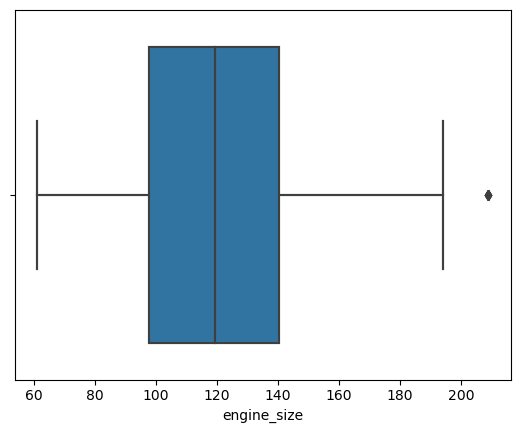

In [150]:
sns.boxplot(data.engine_size)
plt.show()

#### bore

In [151]:
data['bore']=pd.to_numeric(data.bore,downcast='float')

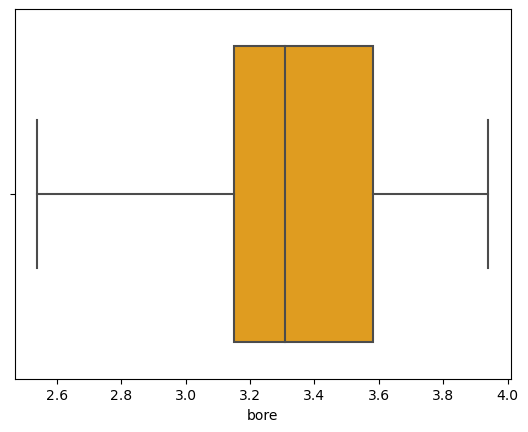

In [152]:
sns.boxplot(x=data.bore,color='orange')
plt.show()

#### stroke

In [153]:
data['stroke']=pd.to_numeric(data.stroke,downcast='float')

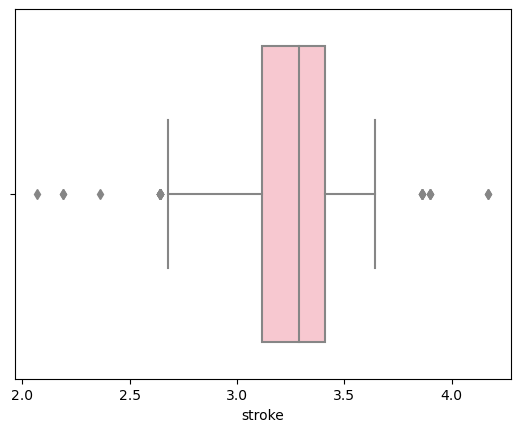

In [154]:
sns.boxplot(x=data.stroke,color='pink')
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


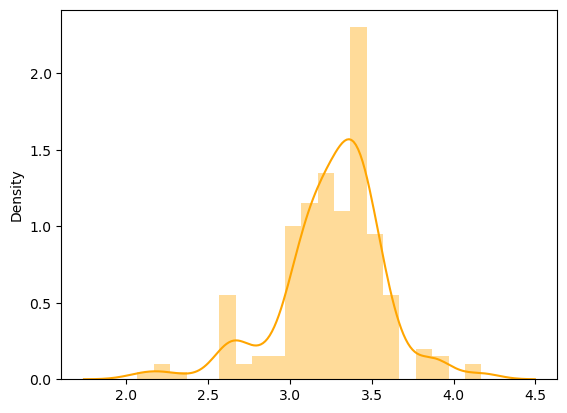

In [155]:
sns.distplot(x=data.stroke,color='orange')
plt.show()

In [156]:
IQR=stats.iqr(data.stroke,interpolation='midpoint')
IQR

0.29500019550323486

In [157]:
Q1=data.stroke.quantile(0.25)
Q3=data.stroke.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [158]:
len(data.loc[data['stroke']<min_limit])

15

In [159]:
len(data.loc[data['stroke']>max_limit])

9

####  compression_ratio

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             200 non-null    int64  
 1   normalized_losses     200 non-null    float32
 2   make                  200 non-null    int64  
 3   body_style            200 non-null    int64  
 4   drive_wheels          200 non-null    int64  
 5   wheel_base            200 non-null    float64
 6   length                200 non-null    float64
 7   width                 200 non-null    float64
 8   height                200 non-null    float64
 9   curb_weight           200 non-null    int64  
 10  engine_type           200 non-null    int64  
 11  num_of_cylinders      200 non-null    int64  
 12  engine_size           200 non-null    float64
 13  fuel_system           200 non-null    int64  
 14  bore                  200 non-null    float32
 15  stroke                2

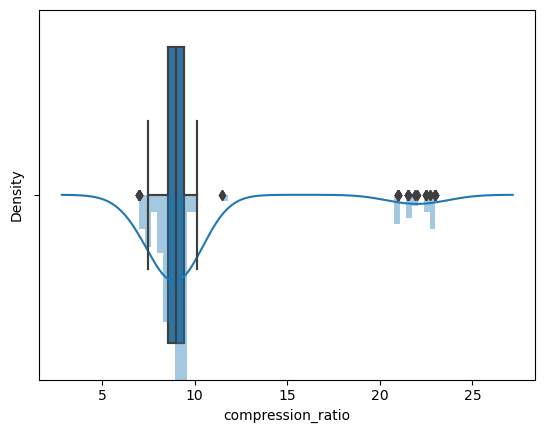

In [163]:
sns.boxplot(x=data.compression_ratio)
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


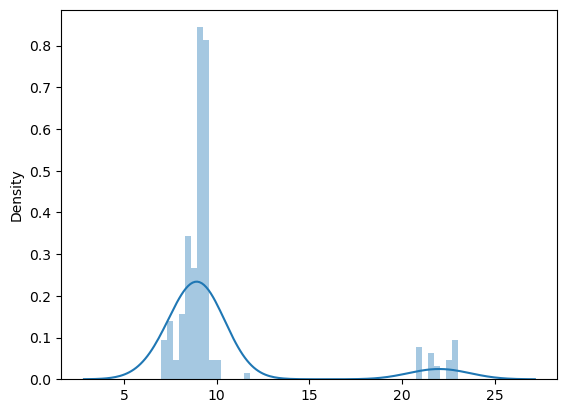

In [164]:
sns.distplot(x=data.compression_ratio)
plt.show()

In [165]:
IQR=stats.iqr(data.compression_ratio,interpolation='midpoint')
IQR

0.8499999999999996

In [166]:
Q1=data.compression_ratio.quantile(0.25)
Q3=data.compression_ratio.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [167]:
data.loc[data['compression_ratio']<min_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
27,3,145.0,5,2,1,95.9,173.2,66.3,50.2,2811,1,1,156.0,7,3.60,3.90,7.0,145,5000,19,24,12964,1,1,1,0
78,3,115.0,12,2,1,95.9,173.2,66.3,50.2,2833,1,1,156.0,5,3.58,3.86,7.0,145,5000,19,24,12629,1,1,1,0
79,3,115.0,12,2,1,95.9,173.2,66.3,50.2,2921,1,1,156.0,5,3.59,3.86,7.0,145,5000,19,24,14869,1,1,1,0
80,3,115.0,12,2,1,95.9,173.2,66.3,50.2,2926,1,1,156.0,5,3.59,3.86,7.0,145,5000,19,24,14489,1,1,1,0
113,0,161.0,14,1,2,108.0,186.7,68.3,56.0,3130,4,1,134.0,1,3.61,3.21,7.0,142,5600,18,24,18150,1,1,0,0
120,3,115.0,15,2,2,95.9,173.2,66.3,50.2,2818,1,1,156.0,5,3.59,3.86,7.0,145,5000,19,24,12764,1,1,1,0


In [168]:
data.loc[data['compression_ratio']>max_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
45,0,115.0,8,1,2,102.0,191.7,65.5,47.8,3950,3,7,119.5,1,3.54,2.76,11.5,262,5000,13,17,36000,1,0,1,0
59,0,115.0,9,1,1,98.8,177.8,66.5,55.5,2443,1,1,122.0,3,3.39,3.39,22.7,64,4650,36,42,10795,0,0,0,0
62,0,115.0,9,1,2,104.9,175.0,66.1,54.4,2700,1,1,134.0,3,3.43,3.64,22.0,72,4200,31,39,18344,0,0,0,0
63,-1,93.0,10,1,2,110.0,190.9,70.3,56.5,3515,1,3,183.0,3,3.58,3.64,21.5,123,4350,22,25,25552,0,1,0,0
64,-1,93.0,10,3,2,110.0,190.9,70.3,58.7,3750,1,3,183.0,3,3.58,3.64,21.5,123,4350,22,25,28248,0,1,0,0
65,0,93.0,10,4,2,106.7,187.5,70.3,54.9,3495,1,3,183.0,3,3.58,3.64,21.5,123,4350,22,25,28176,0,1,1,0
66,-1,93.0,10,1,2,97.0,202.6,65.5,56.3,3770,1,3,183.0,3,3.58,3.64,21.5,123,4350,22,25,31600,0,1,0,0
86,1,128.0,13,1,1,94.5,165.3,63.8,54.5,2017,1,1,103.0,3,2.99,3.47,21.9,55,4800,45,50,7099,0,0,1,0
104,0,161.0,14,1,2,107.9,186.7,68.4,56.7,3197,4,1,152.0,3,3.70,3.52,21.0,95,4150,28,33,13200,0,1,0,0
106,0,115.0,14,3,2,114.2,198.9,68.4,58.7,3430,4,1,152.0,3,3.70,3.52,21.0,95,4150,25,25,13860,0,1,0,0


#### horsepower

In [169]:
data['horsepower']=pd.to_numeric(data.horsepower,downcast='float')

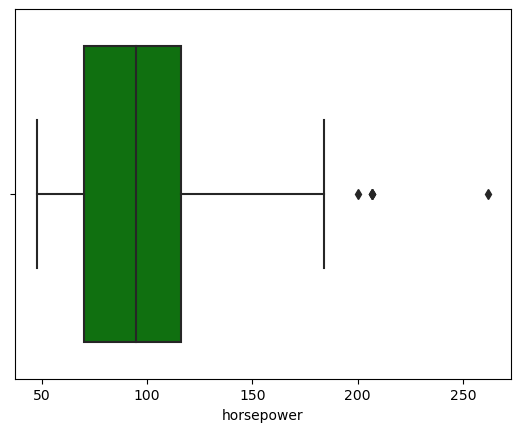

In [171]:
sns.boxplot(x=data.horsepower,color='g')
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


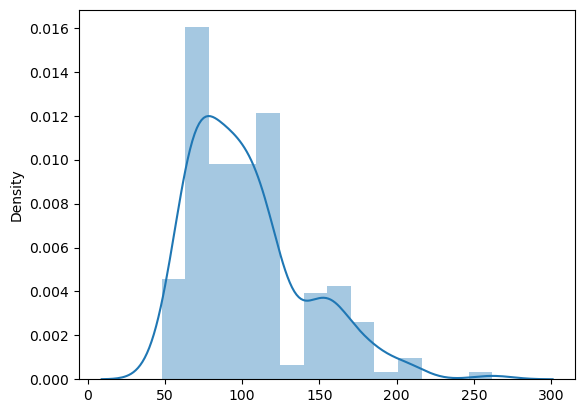

In [172]:
sns.distplot(x=data.horsepower)
plt.show()

In [173]:

IQR=stats.iqr(data.horsepower,interpolation='midpoint')
IQR

46.0

In [174]:
Q1=data.horsepower.quantile(0.25)
Q3=data.horsepower.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [175]:
data.loc[data['horsepower']<min_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear


In [177]:
data.loc[data['horsepower']>max_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
45,0,115.0,8,1,2,102.0,191.7,65.5,47.8,3950,3,7,119.5,1,3.54,2.76,11.5,262.0,5000,13,17,36000,1,0,1,0
101,3,194.0,13,2,2,91.3,170.7,67.9,49.7,3139,3,2,181.0,1,3.43,3.27,7.8,200.0,5200,17,23,19699,1,1,1,0
122,3,115.0,16,4,2,89.5,168.9,65.0,51.6,2756,2,2,194.0,1,3.74,2.90,9.5,207.0,5900,17,25,32528,1,0,1,1
123,3,115.0,16,4,2,89.5,168.9,65.0,51.6,2756,2,2,194.0,1,3.74,2.90,9.5,207.0,5900,17,25,34028,1,0,1,1
124,3,115.0,16,5,2,89.5,168.9,65.0,51.6,2800,2,2,194.0,1,3.74,2.90,9.5,207.0,5900,17,25,37028,1,0,1,1


In [178]:
data.loc[data['horsepower']>max_limit,'horsepower']=np.median(data.horsepower)

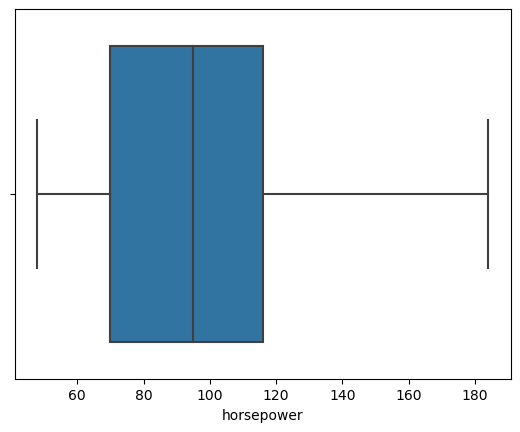

In [179]:
sns.boxplot(x=data.horsepower)
plt.show()

#### peak-rpm

In [180]:
data['peak_rpm']=pd.to_numeric(data.peak_rpm,downcast='float')

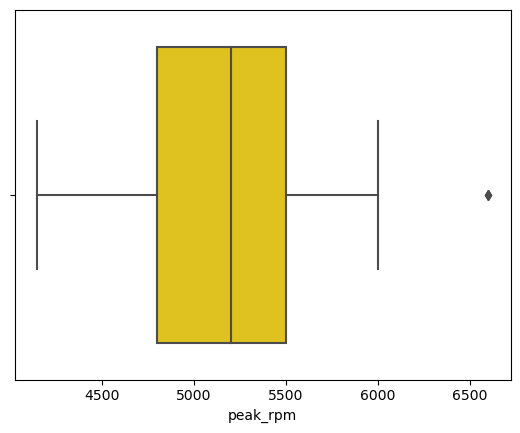

In [186]:
sns.boxplot(x=data.peak_rpm,color='gold')
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


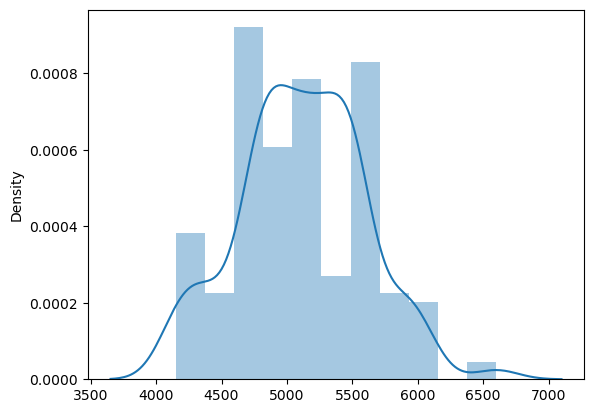

In [187]:
sns.distplot(x=data.peak_rpm)
plt.show()

In [188]:
IQR=stats.iqr(data.peak_rpm,interpolation='midpoint')
IQR

700.0

In [189]:
Q1=data.peak_rpm.quantile(0.25)
Q3=data.peak_rpm.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [190]:
data.loc[data['peak_rpm']>max_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
160,1,168.0,20,1,2,94.5,168.7,64.0,52.6,2265,5,1,98.0,1,3.24,3.08,9.4,112.0,6600.0,26,29,9298,1,0,1,0
161,1,168.0,20,2,2,94.5,168.7,64.0,52.6,2300,5,1,98.0,1,3.24,3.08,9.4,112.0,6600.0,26,29,9538,1,0,1,0


In [191]:
data.shape[0]
len(data.loc[data['peak_rpm']>max_limit]) #### wrong
2/200*100

1.0

In [192]:
data.loc[data['peak_rpm']>max_limit,'peak_rpm']=np.median(data.peak_rpm)

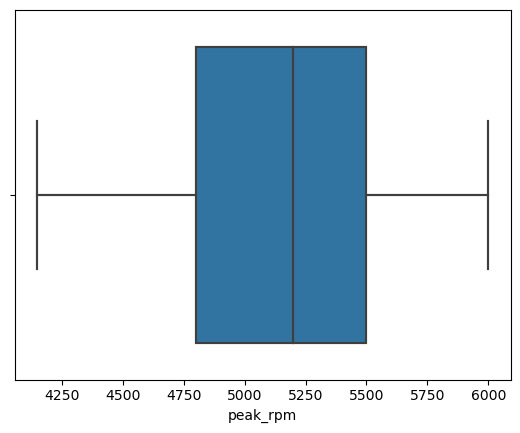

In [194]:
sns.boxplot(x=data.peak_rpm)
plt.show()

#### city-mpg

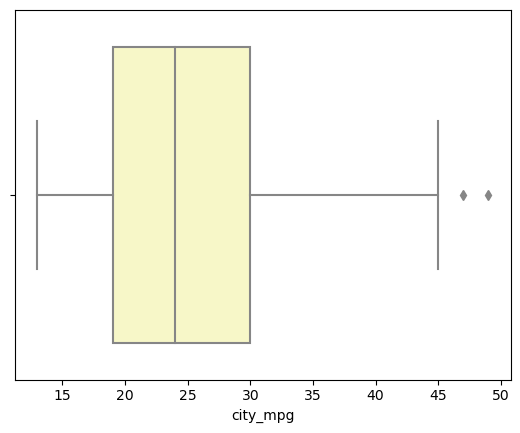

In [214]:
sns.boxplot(x=data.city_mpg,palette='RdYlBu')
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


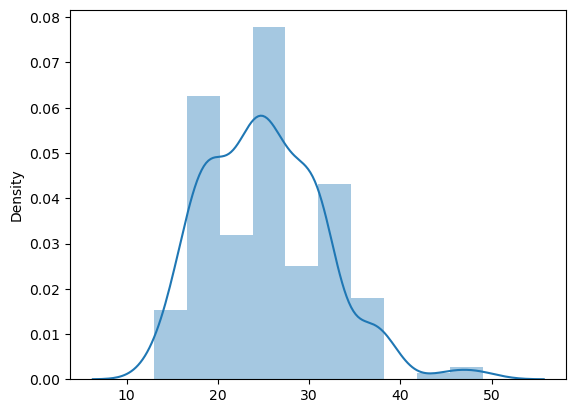

In [215]:
sns.distplot(x=data.city_mpg)
plt.show()

In [216]:
IQR=stats.iqr(data.city_mpg,interpolation='midpoint')
IQR

11.0

In [217]:
data.loc[data['city_mpg']>max_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear


In [218]:
data.loc[data['city_mpg']<min_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,115.0,1,5,2,88.6,168.8,64.1,48.8,2548,5,1,130.0,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1,0,1,0
1,1,115.0,1,2,2,94.5,171.2,65.5,52.4,2823,3,2,152.0,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1,0,1,0
2,2,164.0,2,1,1,99.8,176.6,66.2,54.3,2337,1,1,109.0,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1,0,0,0
3,2,164.0,2,1,3,99.4,176.6,66.4,54.3,2824,1,3,136.0,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1,0,0,0
4,2,115.0,2,1,1,99.8,177.3,66.3,53.1,2507,1,3,136.0,1,3.19,3.40,8.5,110.0,5500.0,19,25,15250,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95.0,22,1,2,109.1,188.8,68.9,55.5,2952,1,1,141.0,1,3.78,3.15,9.5,114.0,5400.0,23,28,16845,1,0,0,0
196,-1,95.0,22,1,2,109.1,188.8,68.8,55.5,3049,1,1,141.0,1,3.78,3.15,8.7,160.0,5300.0,19,25,19045,1,1,0,0
197,-1,95.0,22,1,2,109.1,188.8,68.9,55.5,3012,3,2,173.0,1,3.58,2.87,8.8,134.0,5500.0,18,23,21485,1,0,0,0
198,-1,95.0,22,1,2,109.1,188.8,68.9,55.5,3217,1,2,145.0,3,3.01,3.40,23.0,106.0,4800.0,26,27,22470,0,1,0,0


#### highway-mpg

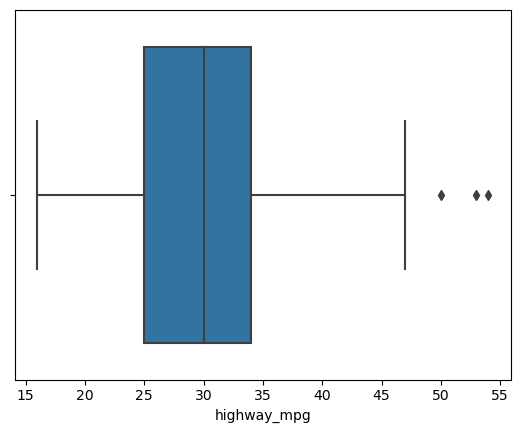

In [219]:
sns.boxplot(x=data.highway_mpg)
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


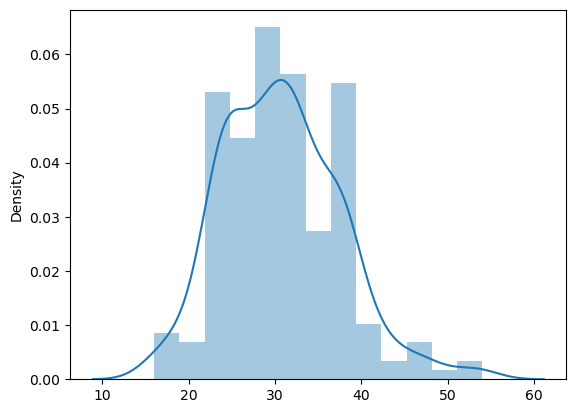

In [220]:
sns.distplot(x=data.highway_mpg)
plt.show()

In [221]:
IQR=stats.iqr(data.highway_mpg,interpolation='midpoint')
IQR

9.0

In [222]:
Q1=data.highway_mpg.quantile(0.25)
Q3=data.highway_mpg.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [223]:
data.loc[data['highway_mpg']>max_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
16,2,121.0,4,2,1,88.4,141.1,60.3,53.2,1488,4,6,61.0,2,2.91,3.03,9.5,48.0,5100.0,47,53,5151,1,0,1,0
28,2,137.0,6,2,1,86.6,144.6,63.9,50.8,1713,1,1,92.0,4,2.91,3.41,9.6,58.0,4800.0,49,54,6479,1,0,1,0
86,1,128.0,13,1,1,94.5,165.3,63.8,54.5,2017,1,1,103.0,3,2.99,3.47,21.9,55.0,4800.0,45,50,7099,0,0,1,0


In [224]:
data.loc[data['highway_mpg']<min_limit]

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear


In [225]:
data.shape[0]
len(data.loc[data['highway_mpg']>max_limit]) #### wrong
3/200*100

1.5

In [226]:
data.loc[data['highway_mpg']>max_limit,'highway_mpg']=np.median(data.highway_mpg)

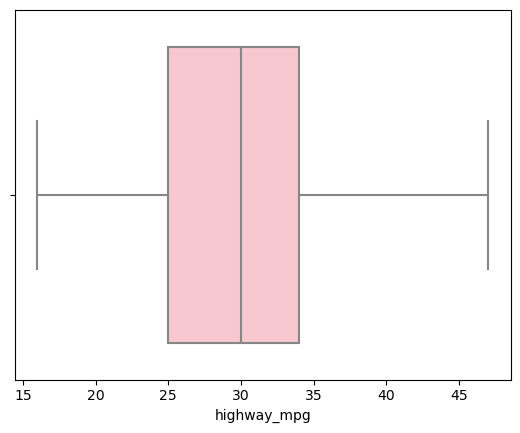

In [228]:
sns.boxplot(x=data.highway_mpg,color='pink')
plt.show()

### Scaling of the data

In [229]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['normalized_losses','make','wheel_base','length','width','height','curb_weight','engine_size','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg']]=scale.fit_transform(data[['normalized_losses','make','wheel_base','length','width','height','curb_weight','engine_size','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg']])

In [230]:
data.head()

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,0.378788,0.000000,5,2,0.072464,0.413433,0.372549,0.083333,0.411171,5,1,0.466216,1,3.47,2.68,0.12500,0.463235,0.459459,0.222222,0.354839,16500,1,0,1,0
1,1,0.378788,0.000000,2,2,0.286232,0.449254,0.509804,0.383333,0.517843,3,2,0.614865,1,2.68,3.47,0.12500,0.779412,0.459459,0.166667,0.322581,16500,1,0,1,0
2,2,0.750000,0.047619,1,1,0.478261,0.529851,0.578431,0.541667,0.329325,1,1,0.324324,1,3.19,3.40,0.18750,0.397059,0.729730,0.305556,0.451613,13950,1,0,0,0
3,2,0.750000,0.047619,1,3,0.463768,0.529851,0.598039,0.541667,0.518231,1,3,0.506757,1,3.19,3.40,0.06250,0.492647,0.729730,0.138889,0.193548,17450,1,0,0,0
4,2,0.378788,0.047619,1,1,0.478261,0.540299,0.588235,0.441667,0.395268,1,3,0.506757,1,3.19,3.40,0.09375,0.455882,0.729730,0.166667,0.290323,15250,1,0,1,0


In [231]:
data.duplicated().sum()

0

In [232]:
## Saving the preprocessed data.
data.to_csv('preprocessed_data.csv')

In [3]:
## Loading the data
df=pd.read_csv('preprocessed_data.csv')

In [4]:
df.head()

,Unnamed: 0,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,0,3,0.378788,0.000000,5,2,0.072464,0.413433,0.372549,0.083333,...,0.12500,0.463235,0.459459,0.222222,0.354839,16500,1,0,1,0
1,1,1,0.378788,0.000000,2,2,0.286232,0.449254,0.509804,0.383333,...,0.12500,0.779412,0.459459,0.166667,0.322581,16500,1,0,1,0
2,2,2,0.750000,0.047619,1,1,0.478261,0.529851,0.578431,0.541667,...,0.18750,0.397059,0.729730,0.305556,0.451613,13950,1,0,0,0
3,3,2,0.750000,0.047619,1,3,0.463768,0.529851,0.598039,0.541667,...,0.06250,0.492647,0.729730,0.138889,0.193548,17450,1,0,0,0
4,4,2,0.378788,0.047619,1,1,0.478261,0.540299,0.588235,0.441667,...,0.09375,0.455882,0.729730,0.166667,0.290323,15250,1,0,1,0


## feature selection

In [5]:
l1=['Unnamed: 0']
df.drop(l1,axis=1,inplace=True)

In [6]:
df

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,0.378788,0.000000,5,2,0.072464,0.413433,0.372549,0.083333,0.411171,...,0.12500,0.463235,0.459459,0.222222,0.354839,16500,1,0,1,0
1,1,0.378788,0.000000,2,2,0.286232,0.449254,0.509804,0.383333,0.517843,...,0.12500,0.779412,0.459459,0.166667,0.322581,16500,1,0,1,0
2,2,0.750000,0.047619,1,1,0.478261,0.529851,0.578431,0.541667,0.329325,...,0.18750,0.397059,0.729730,0.305556,0.451613,13950,1,0,0,0
3,2,0.750000,0.047619,1,3,0.463768,0.529851,0.598039,0.541667,0.518231,...,0.06250,0.492647,0.729730,0.138889,0.193548,17450,1,0,0,0
4,2,0.378788,0.047619,1,1,0.478261,0.540299,0.588235,0.441667,0.395268,...,0.09375,0.455882,0.729730,0.166667,0.290323,15250,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,0.227273,1.000000,1,2,0.815217,0.711940,0.843137,0.641667,0.567882,...,0.15625,0.485294,0.675676,0.277778,0.387097,16845,1,0,0,0
196,-1,0.227273,1.000000,1,2,0.815217,0.711940,0.833333,0.641667,0.605508,...,0.10625,0.823529,0.621622,0.166667,0.290323,19045,1,1,0,0
197,-1,0.227273,1.000000,1,2,0.815217,0.711940,0.843137,0.641667,0.591156,...,0.11250,0.632353,0.729730,0.138889,0.225806,21485,1,0,0,0
198,-1,0.227273,1.000000,1,2,0.815217,0.711940,0.843137,0.641667,0.670675,...,1.00000,0.426471,0.351351,0.361111,0.354839,22470,0,1,0,0


<AxesSubplot:>

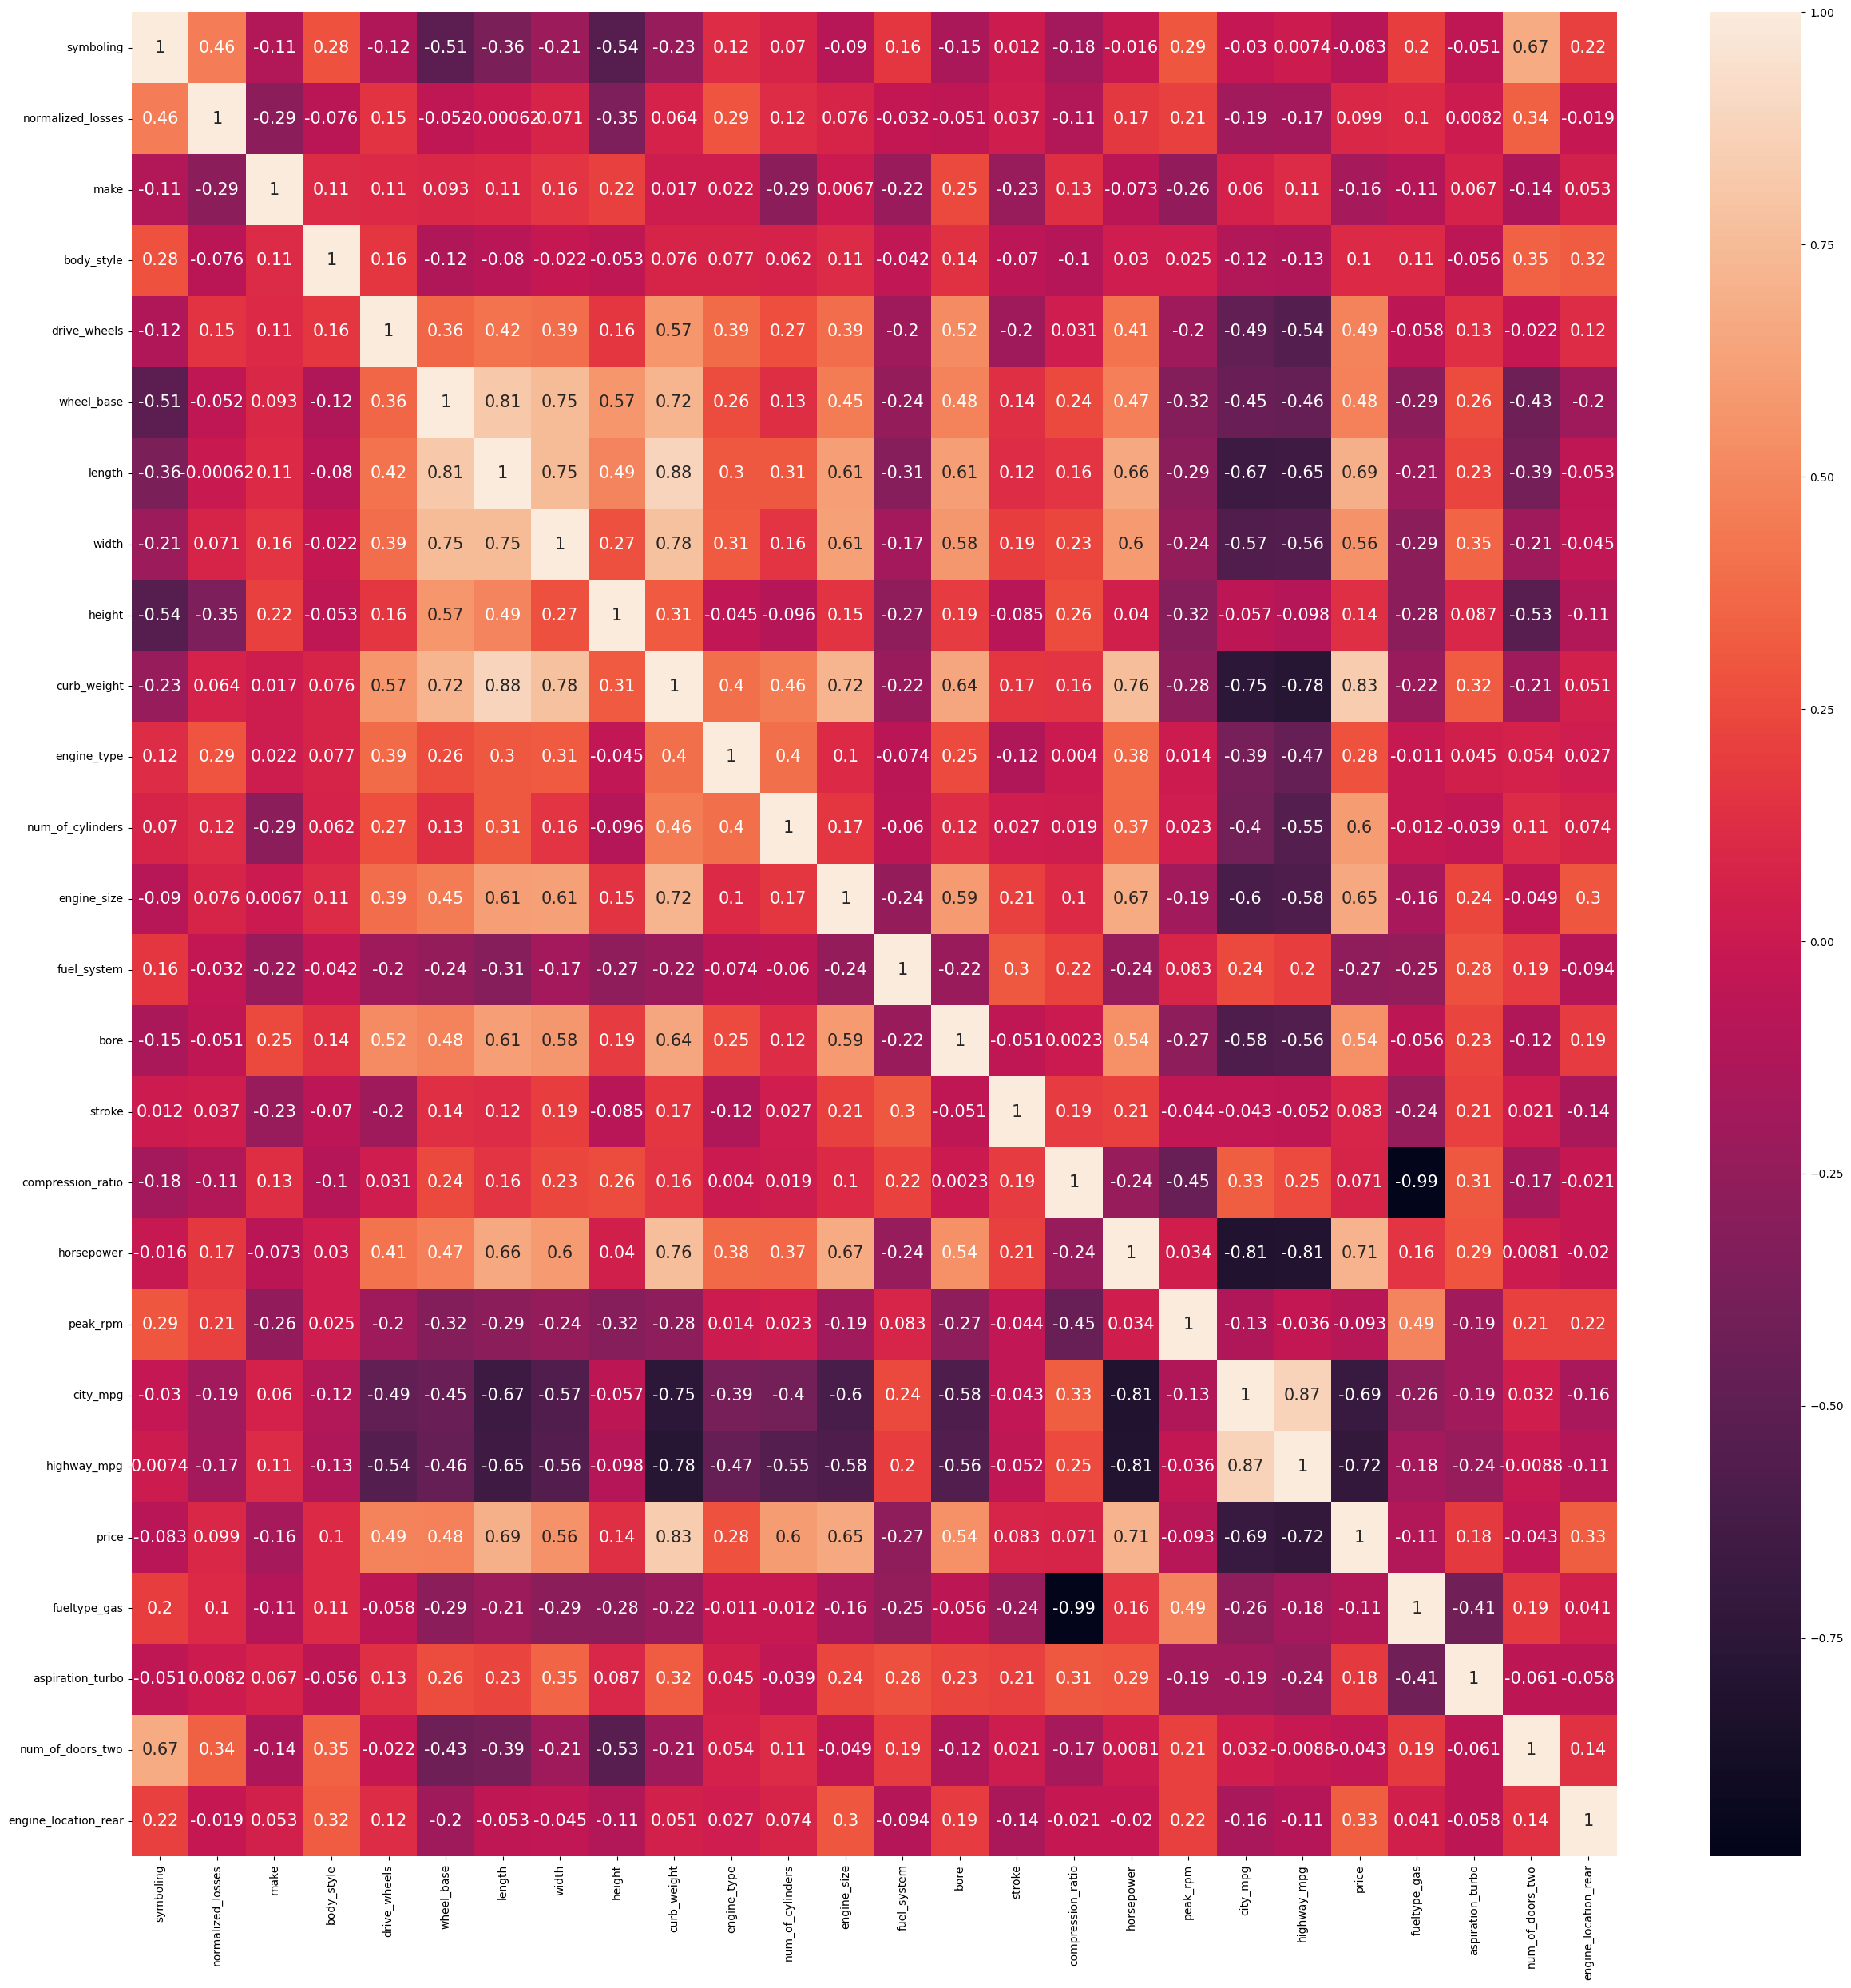

In [7]:
plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df.corr(), annot=True, annot_kws={"size":15})#plotting heat map to check correlation

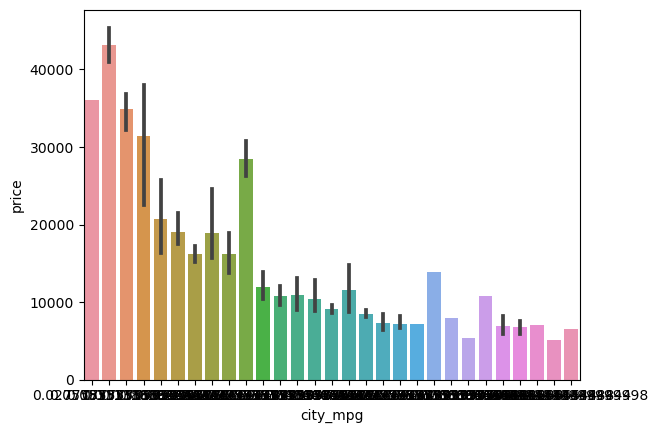

In [8]:
sns.barplot(x='city_mpg',y='price',data=df)
plt.show()

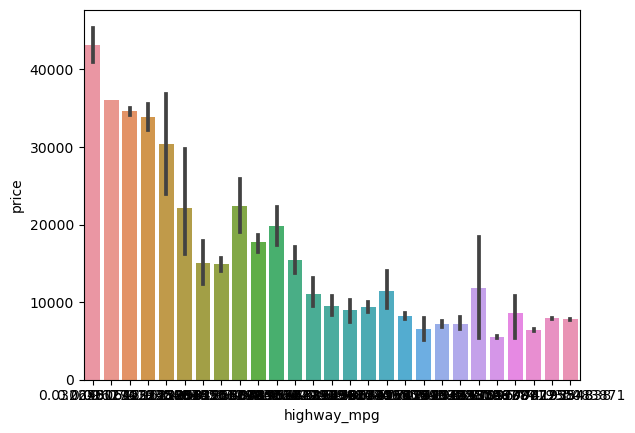

In [9]:
sns.barplot(x='highway_mpg',y='price',data=df)
plt.show()

In [10]:
corr1=df[['wheel_base','length','width','height','curb_weight']]


<AxesSubplot:>

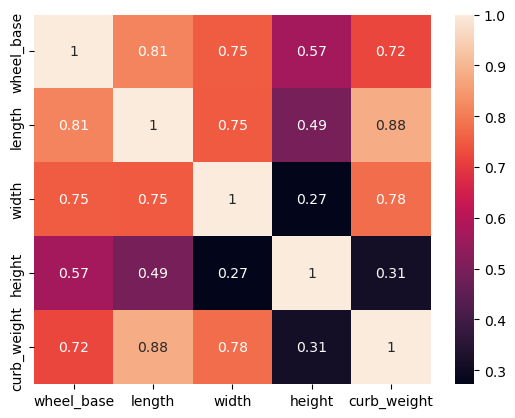

In [11]:
sns.heatmap(corr1.corr(),annot=True)

Wheelbase , carlength, carwidth et curbweight [ 0.80 - 0.88 ] are very correlated and we have to keep only one between them.


In [12]:
df.describe()

,symboling,normalized_losses,make,body_style,drive_wheels,wheel_base,length,width,height,curb_weight,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,0.412538,0.588571,1.810000,1.450000,0.432699,0.494448,0.522696,0.499292,0.414160,...,0.198131,0.384081,0.516216,0.338889,0.463548,13205.690000,0.900000,0.180000,0.425000,0.015000
std,1.248557,0.224965,0.295595,0.973983,0.573712,0.202232,0.184286,0.168964,0.202371,0.201162,...,0.250885,0.239420,0.246265,0.178680,0.202508,7966.982558,0.300753,0.385152,0.495584,0.121857
min,-2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.267045,0.380952,1.000000,1.000000,0.286232,0.381716,0.379902,0.350000,0.261831,...,0.098437,0.161765,0.351351,0.166667,0.290323,7775.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.378788,0.571429,2.000000,1.000000,0.376812,0.479104,0.509804,0.525000,0.359193,...,0.125000,0.345588,0.567568,0.305556,0.451613,10270.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.545455,0.904762,2.000000,2.000000,0.536232,0.632836,0.607843,0.643750,0.558670,...,0.150000,0.500000,0.729730,0.472222,0.580645,16500.750000,1.000000,0.000000,1.000000,0.000000
max,3.000000,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.drop(['city_mpg','width','length','height','wheel_base'], axis=1,inplace=True)

####  checking co relation with featuers specific to car performance

In [14]:
corr2=df[['bore','engine_size','horsepower']]


<AxesSubplot:>

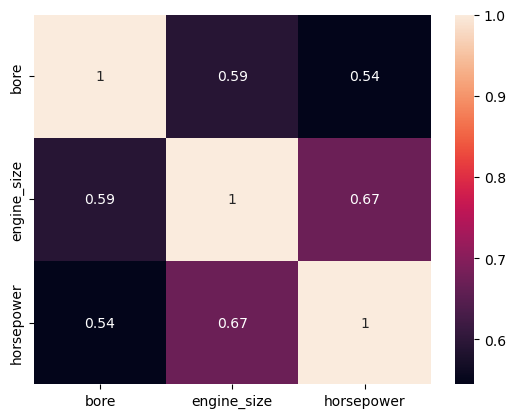

In [16]:
sns.heatmap(corr2.corr(),annot=True)

Horsepower and enginesize are highly correlated and we need to keep only one.

In [17]:
df.drop(['horsepower'], axis=1,inplace=True)

In [18]:
df

,symboling,normalized_losses,make,body_style,drive_wheels,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,peak_rpm,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,0.378788,0.000000,5,2,0.411171,5,1,0.466216,1,3.47,2.68,0.12500,0.459459,0.354839,16500,1,0,1,0
1,1,0.378788,0.000000,2,2,0.517843,3,2,0.614865,1,2.68,3.47,0.12500,0.459459,0.322581,16500,1,0,1,0
2,2,0.750000,0.047619,1,1,0.329325,1,1,0.324324,1,3.19,3.40,0.18750,0.729730,0.451613,13950,1,0,0,0
3,2,0.750000,0.047619,1,3,0.518231,1,3,0.506757,1,3.19,3.40,0.06250,0.729730,0.193548,17450,1,0,0,0
4,2,0.378788,0.047619,1,1,0.395268,1,3,0.506757,1,3.19,3.40,0.09375,0.729730,0.290323,15250,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,0.227273,1.000000,1,2,0.567882,1,1,0.540541,1,3.78,3.15,0.15625,0.675676,0.387097,16845,1,0,0,0
196,-1,0.227273,1.000000,1,2,0.605508,1,1,0.540541,1,3.78,3.15,0.10625,0.621622,0.290323,19045,1,1,0,0
197,-1,0.227273,1.000000,1,2,0.591156,3,2,0.756757,1,3.58,2.87,0.11250,0.729730,0.225806,21485,1,0,0,0
198,-1,0.227273,1.000000,1,2,0.670675,1,2,0.567568,3,3.01,3.40,1.00000,0.351351,0.354839,22470,0,1,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             200 non-null    int64  
 1   normalized_losses     200 non-null    float64
 2   make                  200 non-null    float64
 3   body_style            200 non-null    int64  
 4   drive_wheels          200 non-null    int64  
 5   curb_weight           200 non-null    float64
 6   engine_type           200 non-null    int64  
 7   num_of_cylinders      200 non-null    int64  
 8   engine_size           200 non-null    float64
 9   fuel_system           200 non-null    int64  
 10  bore                  200 non-null    float64
 11  stroke                200 non-null    float64
 12  compression_ratio     200 non-null    float64
 13  peak_rpm              200 non-null    float64
 14  highway_mpg           200 non-null    float64
 15  price                 2

## Model  for Linear Regression

In [21]:
df.head()

,symboling,normalized_losses,make,body_style,drive_wheels,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,peak_rpm,highway_mpg,price,fueltype_gas,aspiration_turbo,num_of_doors_two,engine_location_rear
0,3,0.378788,0.000000,5,2,0.411171,5,1,0.466216,1,3.47,2.68,0.12500,0.459459,0.354839,16500,1,0,1,0
1,1,0.378788,0.000000,2,2,0.517843,3,2,0.614865,1,2.68,3.47,0.12500,0.459459,0.322581,16500,1,0,1,0
2,2,0.750000,0.047619,1,1,0.329325,1,1,0.324324,1,3.19,3.40,0.18750,0.729730,0.451613,13950,1,0,0,0
3,2,0.750000,0.047619,1,3,0.518231,1,3,0.506757,1,3.19,3.40,0.06250,0.729730,0.193548,17450,1,0,0,0
4,2,0.378788,0.047619,1,1,0.395268,1,3,0.506757,1,3.19,3.40,0.09375,0.729730,0.290323,15250,1,0,1,0


In [22]:
X=df.drop('price',axis=1)
y=df.price

In [23]:
from sklearn.model_selection import train_test_split
Xl_train,Xl_test,yl_train,yl_test=train_test_split(X,y,test_size=0.4,random_state=4)

In [24]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(Xl_train,yl_train) 
# training of linear regression
y_predict=LR.predict(Xl_test)

### Model evaluation

In [25]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(yl_test,y_predict)

In [26]:
r2score

0.8328879047620205

In [27]:
adjusted_r2 = 1-(1-0.83)*(80)/(80-1)
adjusted_r2

0.8278481012658228

In [28]:
yl_test.shape

(80,)

In [29]:
import math
print(mean_squared_error(yl_test,y_predict))
print(math.sqrt(mean_squared_error(yl_test,y_predict)))

10439759.947039947
3231.061736804165


In [30]:
print(mean_absolute_error(yl_test,y_predict))

2336.7096817408164


In [31]:
LR.intercept_

-9689.690352107129

In [32]:
LR.coef_

array([ 1.67437074e+01, -8.23460953e+02, -4.28065215e+03, -6.75587973e+02,
       -3.11389586e+02,  3.18008975e+04, -7.58653667e+02,  2.47757477e+03,
       -2.67334732e+03, -9.23620182e+02,  3.25338398e+03, -1.04917099e+03,
        5.79675684e+03,  1.38409420e+03,  1.42991228e+03,  4.47616342e+03,
        7.51070317e+02,  1.70706248e+03,  1.51704470e+04])

#### Linear Reggression  model is performing good with the r2 score of 83% and adjusted_r2 82%

## Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(Xl_train,yl_train) ## fitting the data
y_gbm=gbm.predict(Xl_test)

In [34]:
r2score=r2_score(yl_test,y_gbm)
r2score

0.9086360012271033

In [35]:
yl_test.shape

(80,)

In [36]:
adjusted_r2 = 1-(1-0.90)*(80)/(80-1)
adjusted_r2

0.8987341772151899

#### After applying GB boosting on linear regression model the score are improved : r2 score  90% 

### Model for KNN 

In [39]:
Xk_train,Xk_test,yk_train,yk_test=train_test_split(X,y,random_state=50)

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):
    
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(Xk_train, yk_train)  #fit the model
    pred=model.predict(Xk_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(yk_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3322.354683052368
RMSE value for k=  2 is: 3068.3603667105335
RMSE value for k=  3 is: 3629.4057392361087
RMSE value for k=  4 is: 3611.8825756106744
RMSE value for k=  5 is: 3794.1036335872536
RMSE value for k=  6 is: 4011.0736745636796
RMSE value for k=  7 is: 4661.80396211858
RMSE value for k=  8 is: 4710.5509675090025
RMSE value for k=  9 is: 4854.12263191599
RMSE value for k=  10 is: 4944.423209758647
RMSE value for k=  11 is: 4994.705564184195
RMSE value for k=  12 is: 5180.244135884052
RMSE value for k=  13 is: 5272.686258636278
RMSE value for k=  14 is: 5373.366621113616
RMSE value for k=  15 is: 5415.767807159635
RMSE value for k=  16 is: 5382.6849912328835
RMSE value for k=  17 is: 5382.872997209116
RMSE value for k=  18 is: 5424.95896515743
RMSE value for k=  19 is: 5483.905403897114


In [41]:
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(Xk_train,yk_train)

KNeighborsRegressor()

In [43]:
y_pred = knn1.predict(Xk_test)
y_pred

array([15837. ,  9896.2, 27710. ,  6200.2, 12703. ,  5990.4, 16647. ,
       11126.6, 10628.8,  7299.4,  7749.4, 15843. , 29317.8, 14967.6,
        8699.2, 13690.8,  8520.4,  7085.4, 10237.6,  6623. ,  6772.6,
        7749.4,  7085.4, 16322.8,  8630.6,  7551. , 15813. ,  7209.4,
       13690.8, 14992. , 19847.8,  8520.4,  6773.8,  8391.6,  7085.4,
       11834.8, 22272. , 13629. ,  9664.6, 12637. ,  9674.6, 10469. ,
        8481.8, 12294. ,  7777.4, 13584.8,  7707.4, 16322.8, 27710. ,
       10373.4])

### Model Evaluation for KNN

In [44]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(yk_test,y_pred)

In [45]:
r2score

0.7514256363081244

In [46]:
Xk_test.shape

(50, 19)

In [47]:
adjusted_r2 = 1-(1-0.75)*(50-19)/(50-19-1)
adjusted_r2

0.7416666666666667

In [48]:
import math
print(mean_squared_error(yk_test,y_pred))
print(math.sqrt(mean_squared_error(yk_test,y_pred)))

14395222.3824
3794.1036335872536


##### KNN model scores are : r2 score of 75% and adjusted_r2 74%

#### GB Boosting 

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(Xk_train,yk_train) ## fitting the data
y_gbm=gbm.predict(Xk_test)

In [50]:
r2score=r2_score(yk_test,y_gbm)
r2score

0.9341652116134093

In [51]:
yk_test.shape

(50,)

In [52]:
adjusted_r2 = 1-(1-0.92)*(50)/(50-1)
adjusted_r2

0.9183673469387755

##### After applying GB boosting on KNN model the score are improved : r2 score  92%

### Model for SVR

In [53]:
from sklearn.model_selection import train_test_split
Xs_train,Xs_test,ys_train,ys_test=train_test_split(X, y,random_state=4)

In [54]:
from sklearn.svm import SVR
svregressor = SVR() ## base model with default parameters
svregressor.fit(Xs_train, ys_train)

SVR()

In [56]:
y_hats=svregressor.predict(Xs_test)
y_hats

array([ 9998.16921472, 10002.9072776 ,  9991.98112091, 10010.62548097,
       10001.73254228, 10005.88184269,  9987.76434676,  9988.33077355,
        9988.46179258,  9991.93034433,  9995.81277575,  9999.21386966,
       10000.49705007, 10000.52728962,  9995.81046447,  9992.75099849,
        9989.20777006,  9995.61955788,  9996.18990557,  9993.32050526,
        9989.20791459, 10002.57609408,  9987.67211371,  9989.28142956,
        9986.9011988 , 10001.59650457, 10004.79288879,  9997.63940899,
        9998.37402219,  9997.63995718,  9993.45088658,  9989.85729114,
        9996.60737565, 10009.17673274,  9990.78664668,  9993.21222742,
       10002.52082388,  9991.31843889,  9991.21655061,  9994.50710198,
        9993.33136055,  9991.27399899,  9991.19409475,  9989.97611391,
       10000.48883228,  9988.44156822,  9986.90279669,  9987.65296916,
        9996.89485505, 10009.85617852])

### Model Evaluation

In [57]:
r2score=r2_score(ys_test,y_hats)

In [58]:
r2score

-0.25750445245807696

In [103]:
ys_test.shape

(50,)

In [104]:
print(mean_squared_error(ys_test,y_hats))
print(math.sqrt(mean_squared_error(ys_test,y_hats)))

104566576.41711214
10225.779990646784


# Conclusion

-we tried predicting the car price using the various parameters that were provided in the data about the car. We build machine learning models like Linear regression,KNN,SVM to predict car prices and saw that machine learning-based model Linear Regression performed well at this data.

r2scores of different models:
 - Linear regression = 0.83
 - KNN = 0.75
 - SVM regressor is not appropriate for this dataset

## Challenges

- There were many outleirs
- After running the linear regression model we got a r2score of 0.71 even after handling the outliers and doing all the preprocessing of the data
- later on we removed all the highly correlated values and the models r2score improved to 0.90